# 📝Video_Game_Planning_Project

#### DATASCIENCE / SECTION 1 / PROJECT 1

##### Codestates AI Bootcamp 15th 정경재

# 🌱 과제 안내사항

정경재님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

추가로, 정경재님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.


 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

	1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

	2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

	3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
	
위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.


# 🔍Part1. DATA Pre-processing

In [1]:
#모듈 Import
import pandas as pd
import re
import math
import numpy as np
import sympy as sym
import scipy as sp
from scipy import stats
import random
import sklearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import plotly.express as plex
from plotly.subplots import make_subplots as plsub
import plotly.graph_objects as go

데이터 불러오기

In [2]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


필요없는 데이터 삭제

In [3]:
df1 = df.iloc[:,1:]
display(df1.head())
display(df1.info())

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


None

원본 데이터 Shape

In [4]:
df1.shape

(16598, 9)

### STEP1. 결측치 처리

결측치 수 확인

In [5]:
df1.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Year, Genre는 중요한 factor, 다른 데이터에서 대체할 방법이 없음

전체 데이터에서 차지하는 비중이 적으니 결측치는 제거하겠음 (Year 271개, Genre 50개)

In [6]:
df_year_null = df1[df1.Year.isnull()|df.Genre.isnull()]
df1_drop = df1.drop(index=df_year_null.index).reset_index(drop=True)
df1_drop.shape

(16277, 9)

제거된 데이터 갯수

In [7]:
df1.shape[0]-df1_drop.shape[0]

321

Publisher는 데이터 분석에서 참고용 자료로 쓸예정, Unknown 으로 대체하도록 하겠음

In [8]:
df2 = df1_drop.copy()
df2.Publisher = df2.Publisher.fillna('Unknown')
df2.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

결측치 처리후 shape

In [9]:
df2.shape

(16277, 9)

### STEP2. 오류데이터 확인, 대체

Column 순서대로 오류를 확인하도록 하겠음

Platform column 확인

In [10]:
df2.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

사전 조사 결과에 따라 Platform column의 표기 오류는 없었음.

Year column 확인

In [11]:
df2.Year.unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

Year column 타입 integer로 변경

In [12]:
Year_series = df2.Year.astype(int)
Year_series.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

Year Series 수정

In [13]:
def year(y):
    if (y>=0) and (y<22):
        y = y+2000
    elif (y>=22) and (y<1000):
        y = y+1900
    else:
        y = y
    return y
Year_fix = Year_series.apply(year)
Year_fix.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020], dtype=int64)

수정결과를 반영하기

In [14]:
df3 = df2.copy()
df3.Year = Year_fix
df3.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020], dtype=int64)

Genre column 확인

In [15]:
df3.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

Genre column 이상없음

Sales column 확인

In [16]:
df3.iloc[:,-4:].dtypes

NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

object인 것으로 보아 숫자가 아닌 데이터가 섞여있을 가능성이 커보임

NorthAmerica 알파벳이 있는 열을 확인해봄

In [17]:
df3_NA_err = df3[df3.NA_Sales.str.contains('[a-zA-Z]')]
df3_NA_err.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
440,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
451,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27


K와 M이 보임.

K는 1,000 M은 1,000,000

K,M이 안붙어있는 데이터의 단위가 M인것으로 확인함

단위를 M으로 통일시키도록 하겠음

In [18]:
def scalefix(s):
    if s.endswith('K'):
        s = s.replace('K','')
        s = float(s)*0.001
    elif s.endswith('M'):
        s = s.replace('M','')
    return s
df3_fix_test = df3_NA_err.NA_Sales.apply(scalefix)
df3_fix_test.head()

10     0.48
44     0.06
142     0.0
440    0.58
451    0.25
Name: NA_Sales, dtype: object

모든 Sales column에 적용

In [19]:
df3_Sales = df3.iloc[:,-4:]
df3_Sales_fix = df3_Sales.applymap(scalefix)
df3_Sales_fix_f = df3_Sales_fix.astype(float)
df3_Sales_fix_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16277 non-null  float64
 1   EU_Sales     16277 non-null  float64
 2   JP_Sales     16277 non-null  float64
 3   Other_Sales  16277 non-null  float64
dtypes: float64(4)
memory usage: 508.8 KB


수정사항 덮어쓰기

In [20]:
df4 = df3.copy()
df4.iloc[:,-4:] = df3_Sales_fix_f
display(df4.dtypes)
display(df4.describe())

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.264964,0.147202,0.078111,0.048134
std,5.828646,0.821587,0.507802,0.308951,0.189480
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


### STEP3. 중복치 확인, 제거

중복치 탐색(Name, Platform, Year, Publisher가 같다면 같은 게임으로 취급)

In [21]:
df4[df4.duplicated(subset=['Name','Platform','Year','Publisher'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7210,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8559,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


중복된 index 8559와 7210의 Sales 값 비교결과 8559의 데이터는 오류인 것으로 판단, 제거하겠음

In [22]:
df5 = df4.drop(index=8559).reset_index(drop=True)
df5[df5.duplicated(subset=['Name','Platform','Year','Publisher'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


중복치 제거 후 shape

In [23]:
df5.shape

(16276, 9)

### 전처리 데이터 저장

전처리 완료. 데이터 확인 후 저장 진행.

In [24]:
display(df5.info())
display(df5.isnull().sum())
print('중복 값 수 : {}'.format(df5.duplicated(subset=['Name','Platform','Year','Publisher'],keep=False).sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16276 entries, 0 to 16275
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16276 non-null  object 
 1   Platform     16276 non-null  object 
 2   Year         16276 non-null  int64  
 3   Genre        16276 non-null  object 
 4   Publisher    16276 non-null  object 
 5   NA_Sales     16276 non-null  float64
 6   EU_Sales     16276 non-null  float64
 7   JP_Sales     16276 non-null  float64
 8   Other_Sales  16276 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


None

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

중복 값 수 : 0


저장 진행

In [25]:
df5.to_csv('vgames_pre.csv',index=False)

# 🔍Part2. Feature Engineering

데이터 불러오기

In [26]:
fe = pd.read_csv('vgames_pre.csv')
fe.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


FE전 원본 데이터 shape

In [27]:
fe.shape

(16276, 9)

### STEP1. Global Sales feature 생성

원본 통계치 확인

In [28]:
fe.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16276.000000,16276.000000,16276.000000,16276.000000,16276.000000
mean,2006.407287,0.264980,0.147210,0.078116,0.048137
std,5.828660,0.821609,0.507816,0.308960,0.189486
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


Global Sales column 생성 후 확인

In [29]:
fe1 = fe.copy()
fe1['Global_Sales'] = fe1.NA_Sales+fe1.EU_Sales+fe1.JP_Sales+fe1.Other_Sales
fe1.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16276.000000,16276.000000,16276.000000,16276.000000,16276.000000,16276.000000
mean,2006.407287,0.264980,0.147210,0.078116,0.048137,0.538443
std,5.828660,0.821609,0.507816,0.308960,0.189486,1.562334
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


shape확인

In [30]:
fe1.shape

(16276, 10)

### STEP2. Platform type feature 생성

platform column value 확인

In [31]:
print('platform 수 : {}'.format(len(fe1.Platform.unique())))
fe1.Platform.unique()

platform 수 : 31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

사전조사에 의한 platform 타입별 분류

In [32]:
Traditional = ['2600','NES','SNES','N64','GC','Wii','WiiU',
               'GEN','SAT','DC','PS','PS2','PS3','PS4',
               'XB','X360','XOne']
Portable = ['GB','GBA','DS','3DS','PSP','PSV']
PC = ['PC']

분류에 포함되지 않는 데이터 수 확인

In [33]:
fe1_type = fe1[~fe1.Platform.isin(Traditional+Portable+PC)]
print('분류에 포함되지 않는 데이터 수: {}'.format(fe1_type.shape[0]))

분류에 포함되지 않는 데이터 수: 31


전체 집단에비해 수가 매우 작으므로 제거

In [34]:
fe2 = fe1.copy()
fe2 = fe2.drop(index=fe1_type.index).reset_index(drop=True)
fe_type_check = fe2[~fe2.Platform.isin(Traditional+Portable+PC)]
print('제거 후 분류에 포함되지 않는 데이터 수: {}'.format(fe_type_check.shape[0]))
print('\nplatform 수 : {}'.format(len(fe2.Platform.unique())))
fe2.Platform.unique()

제거 후 분류에 포함되지 않는 데이터 수: 0

platform 수 : 24


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN'], dtype=object)

platform 목록이 분류했었던 platform목록과 일치하는지 확인

In [35]:
print(set(fe2.Platform.unique()) == set(Traditional+Portable+PC))

True


platform type으로 반환시키는 함수 정의후 feature 추가

In [36]:
#platform type으로 반환시키는 함수 정의
def plat_type(p):
    if p in Traditional:
        p = 'Traditional'
    elif p in Portable:
        p = 'Portable'
    elif p in PC:
        p = 'PC'
    return p
#platform type column 생성
fe2_type = fe2.copy()
fe2_type['Platform_type'] = fe2_type.Platform.apply(plat_type)
print(fe2_type.Platform_type.unique())
#함수오류로 입력안된 값이 있는지를 확인
print(fe2_type.Platform_type.isnull().sum())
display(fe2_type.head())

['Portable' 'Traditional' 'PC']
0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_type
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Traditional
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Traditional


shape

In [37]:
fe2_type.shape

(16245, 11)

### STEP3. Platform company feature 생성

사전조사에 의한 Platform company 분류

In [38]:
Atari = ['2600']
Nintendo = ['NES','SNES','N64','GC','Wii','WiiU','GB','GBA','DS','3DS']
Sega = ['GEN','SAT','DC']
Sony = ['PS','PS2','PS3','PS4','PSP','PSV']
Microsoft = ['XB','X360','XOne']
PC = ['PC']

platform 목록이 분류했던 목록과 일치하는지 확인

In [39]:
print(set(fe2_type.Platform.unique()) == set(Atari+Nintendo+Sega+Sony+Microsoft+PC))

True


Platform company feature 생성

In [40]:
#platform company으로 반환시키는 함수 정의
def plat_company(p):
    if p in Atari:
        p = 'Atari'
    elif p in Nintendo:
        p = 'Nintendo'
    elif p in Sega:
        p = 'Sega'
    elif p in Sony:
        p = 'Sony'
    elif p in Microsoft:
        p = 'Microsoft'
    elif p in PC:
        p = 'PC'
    return p
#platform type column 생성
fe2_comp = fe2_type.copy()
fe2_comp['Platform_company'] = fe2_comp.Platform.apply(plat_company)
print(fe2_comp.Platform_company.unique())
#함수오류로 입력안된 값이 있는지를 확인
print(fe2_comp.Platform_company.isnull().sum())
display(fe2_comp.head())

['Nintendo' 'Sony' 'PC' 'Microsoft' 'Atari' 'Sega']
0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_type,Platform_company
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable,Nintendo
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Traditional,Nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable,Sony
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable,Nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Traditional,Sony


shape

In [41]:
fe2_comp.shape

(16245, 12)

### STEP4. Generation feature 생성

사전조사에 의한 Generation 분류

In [42]:
gen2 = ['2600']
gen3 = ['NES']
gen4 = ['SNES','GEN','GB']
gen5 = ['N64','SAT','PS']
gen6 = ['GC','DC','PS2','XB','GBA']
gen7 = ['Wii','PS3','X360','DS','PSP']
gen8 = ['WiiU','PS4','XOne','3DS','PSV']
PC = ['PC']

Generation 분류가 platform 목록과 일치하는지 확인

In [43]:
print(set(fe2_comp.Platform.unique()) == set(gen2+gen3+gen4+gen5+gen6+gen7+gen8+PC))

True


Generation feature 생성 (PC는 연도에 따라 기입 예정이라 `np.nan`으로 변환)

In [44]:
#platform generation 반환 함수 정의
def plat_gen(p):
    if p in gen2:
        p = 2
    elif p in gen3:
        p = 3
    elif p in gen4:
        p = 4
    elif p in gen5:
        p = 5
    elif p in gen6:
        p = 6
    elif p in gen7:
        p = 7
    elif p in gen8:
        p = 8
    elif p in PC:
        p = np.nan
    return p
fe2_gen = fe2_comp.copy()
fe2_gen['Generation']=fe2_gen.Platform.apply(plat_gen)
print(fe2_gen.Generation.unique())
print(fe2_gen.Generation.isnull().sum())
print(sum(fe2_gen.Platform=='PC'))

[ 7. nan  5.  6.  8.  2.  4.  3.]
940
940


`np.nan`으로 채운 PC 항목을 채우기 위해 연도별로 분리

In [45]:
fe2_gen2 = fe2_gen.query('1977 < Year <= 1983')
fe2_gen3 = fe2_gen.query('1983 < Year <= 1988')
fe2_gen4 = fe2_gen.query('1988 < Year <= 1994')
fe2_gen5 = fe2_gen.query('1994 < Year <= 1998')
fe2_gen6 = fe2_gen.query('1998 < Year <= 2005')
fe2_gen7 = fe2_gen.query('2005 < Year <= 2013')
fe2_gen8 = fe2_gen.query('2013 < Year <= 2020')

generation 채워넣기

In [46]:
fe2_f_gen2 = fe2_gen2.copy()
fe2_f_gen2.Generation = fe2_f_gen2.Generation.fillna('2')
fe2_f_gen3 = fe2_gen3.copy()
fe2_f_gen3.Generation = fe2_f_gen3.Generation.fillna('3')
fe2_f_gen4 = fe2_gen4.copy()
fe2_f_gen4.Generation = fe2_f_gen4.Generation.fillna('4')
fe2_f_gen5 = fe2_gen5.copy()
fe2_f_gen5.Generation = fe2_f_gen5.Generation.fillna('5')
fe2_f_gen6 = fe2_gen6.copy()
fe2_f_gen6.Generation = fe2_f_gen6.Generation.fillna('6')
fe2_f_gen7 = fe2_gen7.copy()
fe2_f_gen7.Generation = fe2_f_gen7.Generation.fillna('7')
fe2_f_gen8 = fe2_gen8.copy()
fe2_f_gen8.Generation = fe2_f_gen8.Generation.fillna('8')

합치고 타입을 int로 변환

In [47]:
fe2_f_gen = pd.concat([fe2_f_gen2,fe2_f_gen3,fe2_f_gen4,fe2_f_gen5,fe2_f_gen6,fe2_f_gen7,fe2_f_gen8]).sort_index()
fe2_f_gen.Generation = fe2_f_gen.Generation.astype(int)
fe2_f_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16245 entries, 0 to 16244
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16245 non-null  object 
 1   Platform          16245 non-null  object 
 2   Year              16245 non-null  int64  
 3   Genre             16245 non-null  object 
 4   Publisher         16245 non-null  object 
 5   NA_Sales          16245 non-null  float64
 6   EU_Sales          16245 non-null  float64
 7   JP_Sales          16245 non-null  float64
 8   Other_Sales       16245 non-null  float64
 9   Global_Sales      16245 non-null  float64
 10  Platform_type     16245 non-null  object 
 11  Platform_company  16245 non-null  object 
 12  Generation        16245 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 1.7+ MB


데이터 확인

In [48]:
fe2_f_gen.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_type,Platform_company,Generation
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable,Nintendo,7
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Traditional,Nintendo,7
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable,Sony,7
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable,Nintendo,7
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Traditional,Sony,7


shape

In [49]:
fe2_f_gen.shape

(16245, 13)

### STEP5. 멀티플랫폼 feature 생성

단일,멀티여부를 구분하는 column 생성을 위해 이름 기준으로 나눠줌

In [50]:
fe2_mono = fe2_f_gen[~fe2_f_gen.Name.duplicated(keep=False)]
fe2_multi = fe2_f_gen[fe2_f_gen.Name.duplicated(keep=False)]
print(fe2_mono.shape)
print(fe2_multi.shape)
print(fe2_f_gen.shape)
fe2_f_gen.shape[0] == fe2_mono.shape[0]+fe2_multi.shape[0]

(8594, 13)
(7651, 13)
(16245, 13)


True

멀티플랫폼 지원여부 column 생성

In [51]:
fe2_mono2 = fe2_mono.copy()
fe2_multi2 = fe2_multi.copy()
fe2_mono2['Platform_Multi'] = 'Native'
fe2_multi2['Platform_Multi'] = 'Multi'
fe2_multi = pd.concat([fe2_mono2,fe2_multi2]).sort_index()
fe2_multi.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_type,Platform_company,Generation,Platform_Multi
16240,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Traditional,Nintendo,6,Multi
16241,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Portable,Sony,7,Native
16242,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Traditional,Sony,7,Multi
16243,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Portable,Sony,8,Multi
16244,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17,Traditional,Sony,5,Multi


shape

In [52]:
fe2_multi.shape

(16245, 14)

### 최종 데이터 저장

column 순서 바꾸기

In [53]:
fe3 = fe2_multi.copy()
fe3 = fe3[['Name', 'Publisher', 'Year', 'Genre', 'Generation', 'Platform', 'Platform_type', 'Platform_company', 'Platform_Multi', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
fe3.tail()

,Name,Publisher,Year,Genre,Generation,Platform,Platform_type,Platform_company,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16240,Ice Age 2: The Meltdown,Vivendi Games,2006,Platform,6,GC,Traditional,Nintendo,Multi,0.15,0.04,0.00,0.01,0.20
16241,Rainbow Islands: Revolution,Rising Star Games,2005,Action,7,PSP,Portable,Sony,Native,0.01,0.00,0.00,0.00,0.01
16242,NBA 2K16,Take-Two Interactive,2015,Sports,7,PS3,Traditional,Sony,Multi,0.44,0.19,0.03,0.13,0.79
16243,Toukiden: The Age of Demons,Tecmo Koei,2013,Action,8,PSV,Portable,Sony,Multi,0.05,0.05,0.25,0.03,0.38
16244,The King of Fighters '95,Sony Computer Entertainment,1996,Fighting,5,PS,Traditional,Sony,Multi,0.00,0.00,0.16,0.01,0.17


저장전 데이터 체크

In [54]:
display(fe3.info())
display(fe3.isnull().sum())
print('중복값 수 : {}'.format(fe3.duplicated(subset=['Name','Platform','Year','Publisher'],keep=False).sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16245 entries, 0 to 16244
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16245 non-null  object 
 1   Publisher         16245 non-null  object 
 2   Year              16245 non-null  int64  
 3   Genre             16245 non-null  object 
 4   Generation        16245 non-null  int32  
 5   Platform          16245 non-null  object 
 6   Platform_type     16245 non-null  object 
 7   Platform_company  16245 non-null  object 
 8   Platform_Multi    16245 non-null  object 
 9   NA_Sales          16245 non-null  float64
 10  EU_Sales          16245 non-null  float64
 11  JP_Sales          16245 non-null  float64
 12  Other_Sales       16245 non-null  float64
 13  Global_Sales      16245 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(7)
memory usage: 1.8+ MB


None

Name                0
Publisher           0
Year                0
Genre               0
Generation          0
Platform            0
Platform_type       0
Platform_company    0
Platform_Multi      0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

중복값 수 : 0


최종 데이터 저장

In [55]:
fe3.to_csv('vgames_final.csv',index=False)

# 🥇Part3. DATA Analysis

In [56]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [57]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [58]:
pio.renderers.default = "svg"

### 데이터 불러오기

In [59]:
vgames = pd.read_csv('vgames_final.csv')
vgames.head()

,Name,Publisher,Year,Genre,Generation,Platform,Platform_type,Platform_company,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,Destineer,2008,Action,7,DS,Portable,Nintendo,Multi,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Namco Bandai Games,2009,Action,7,Wii,Traditional,Nintendo,Native,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Alchemist,2010,Adventure,7,PSP,Portable,Sony,Native,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,Zoo Games,2010,Misc,7,DS,Portable,Nintendo,Native,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,D3Publisher,2010,Platform,7,PS3,Traditional,Sony,Multi,0.12,0.09,0.00,0.04,0.25


### 1-1. Global Sales Trend

##### 글로벌 총 판매량

In [60]:
Sales_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df_global_sum = vgames[Sales_list].sum()
df_global_sum

NA_Sales        4311.82
EU_Sales        2395.63
JP_Sales        1267.78
Other_Sales      783.42
Global_Sales    8758.65
dtype: float64

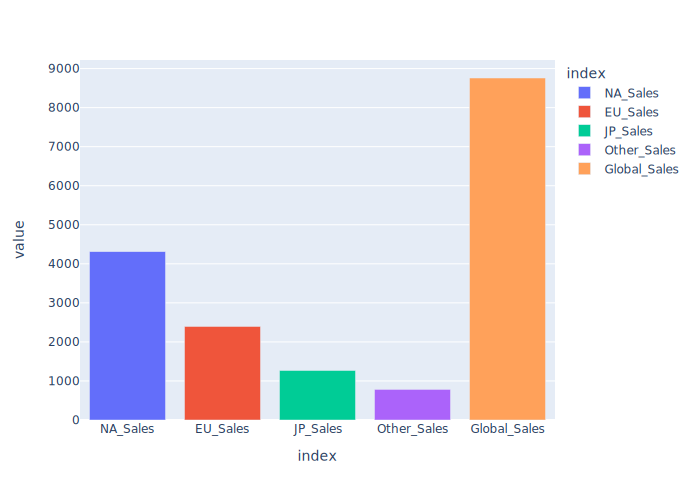

In [61]:
global_sum_bar = plex.bar(df_global_sum,color=df_global_sum.index)
global_sum_bar.show()

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')
[4311.82 2395.63 1267.78  783.42]


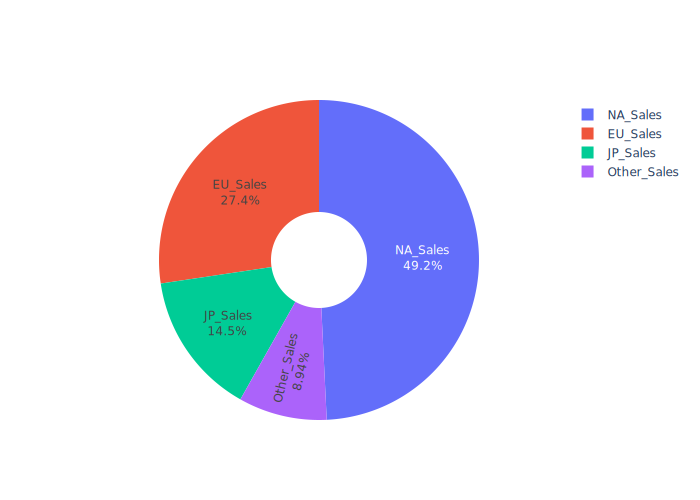

In [62]:
se_global_sum_pie = df_global_sum[:-1]
sum_index = se_global_sum_pie.index
sum_value = se_global_sum_pie.values
print(sum_index)
print(sum_value)
global_sum_pie = go.Figure(data=[go.Pie(labels=sum_index,
                                  values=sum_value,
                                  hole=.3,
                                  textinfo='label+percent')])
global_sum_pie.show()

##### 연도(세대)별 판매량

In [63]:
df_year = vgames.groupby(['Year'],as_index=True)[Sales_list].sum()
df_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.13,0.64,0.00,0.11,10.88
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,19.81,1.93,37.08
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


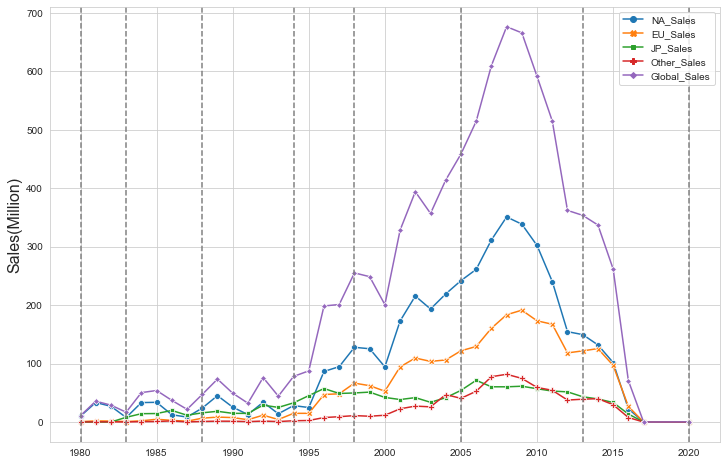

In [64]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_year,markers=True,dashes=False)
plt.axvline(x=1980, color='gray',linestyle='--')
plt.axvline(x=1983, color='gray',linestyle='--')
plt.axvline(x=1988, color='gray',linestyle='--')
plt.axvline(x=1994, color='gray',linestyle='--')
plt.axvline(x=1998, color='gray',linestyle='--')
plt.axvline(x=2005, color='gray',linestyle='--')
plt.axvline(x=2013, color='gray',linestyle='--')
plt.axvline(x=2020, color='gray',linestyle='--')
plt.xlabel('')
plt.ylabel('Sales(Million)',fontsize=16)
plt.show()

In [65]:
df_gen = vgames.groupby(['Generation'],as_index=True)[Sales_list].sum()
df_gen

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Generation,,,,,
2,80.32,4.83,0.00,0.83,85.98
3,125.94,21.20,98.65,5.33,251.12
4,200.93,80.58,204.34,12.84,498.69
5,491.93,262.30,204.91,45.71,1004.85
6,1091.84,526.98,211.58,211.13,2041.53
7,2008.18,1220.93,407.33,424.01,4060.45
8,312.68,278.81,140.97,83.57,816.03


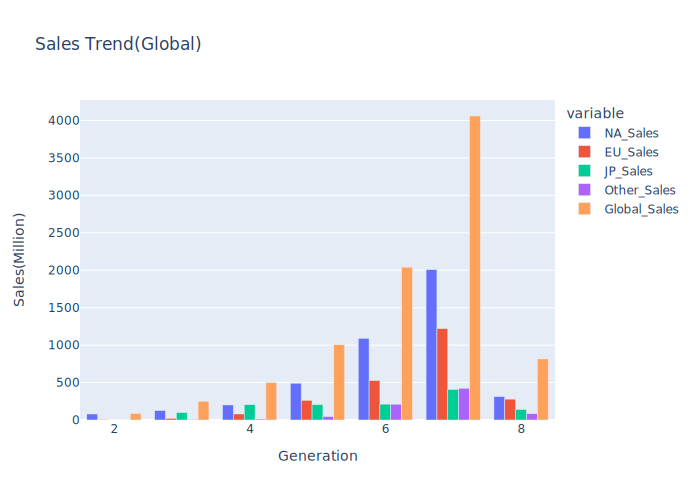

In [66]:
year_genre = plex.bar(data_frame=df_gen,title='Sales Trend(Global)',barmode='group')
year_genre.update_layout(yaxis_title='Sales(Million)')
year_genre.show()

##### 글로벌 최고매출

In [67]:
top20_global = vgames.sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top100_global = vgames.sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)

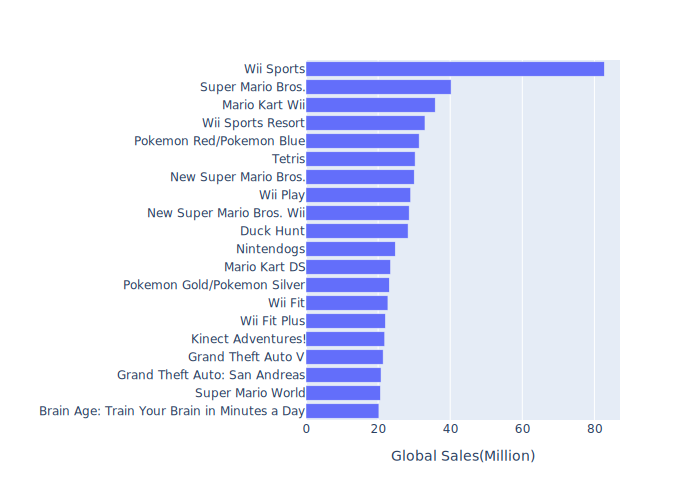

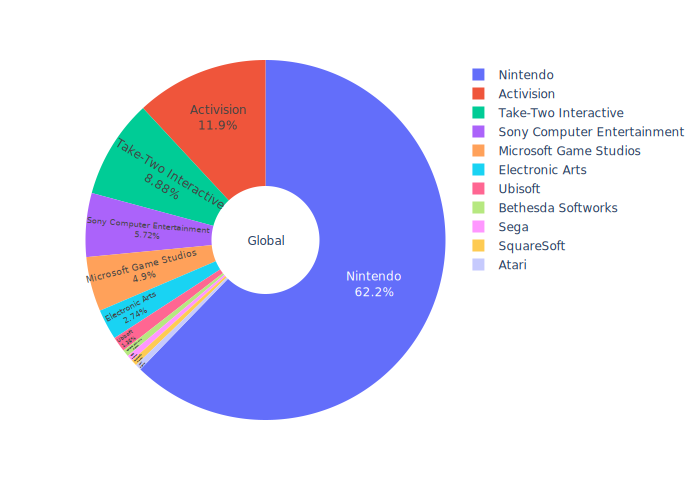

In [68]:
global_top20_name = plex.bar(x=top20_global.Global_Sales,y=top20_global.Name)
global_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
global_top20_name.show()
global_top100_pub_pie = plex.pie(data_frame=top100_global,hole=0.3,
                             values='Global_Sales',names='Publisher')
global_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
global_top100_pub_pie.update_layout(annotations=[dict(text='Global',showarrow=False)])
global_top100_pub_pie.show()

##### 지역별 최고매출

In [69]:
top20_NA = vgames.sort_values(by='NA_Sales',ascending=False).head(20).reset_index(drop=True)
top20_EU = vgames.sort_values(by='EU_Sales',ascending=False).head(20).reset_index(drop=True)
top20_JP = vgames.sort_values(by='JP_Sales',ascending=False).head(20).reset_index(drop=True)
top20_Ot = vgames.sort_values(by='Other_Sales',ascending=False).head(20).reset_index(drop=True)
top100_NA = vgames.sort_values(by='NA_Sales',ascending=False).head(100).reset_index(drop=True)
top100_EU = vgames.sort_values(by='EU_Sales',ascending=False).head(100).reset_index(drop=True)
top100_JP = vgames.sort_values(by='JP_Sales',ascending=False).head(100).reset_index(drop=True)
top100_Ot = vgames.sort_values(by='Other_Sales',ascending=False).head(100).reset_index(drop=True)

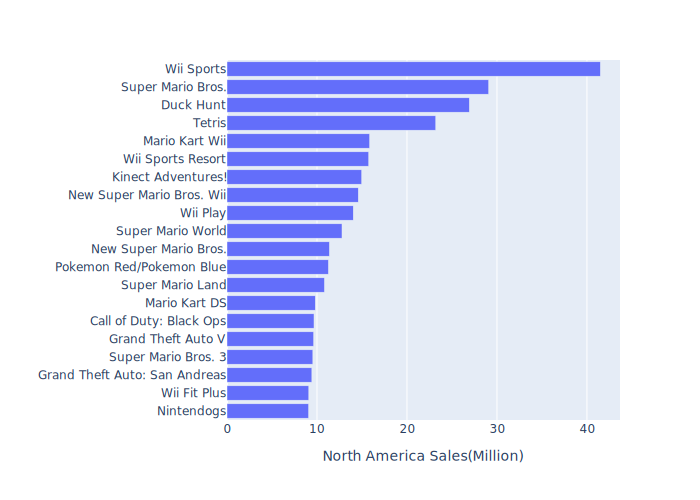

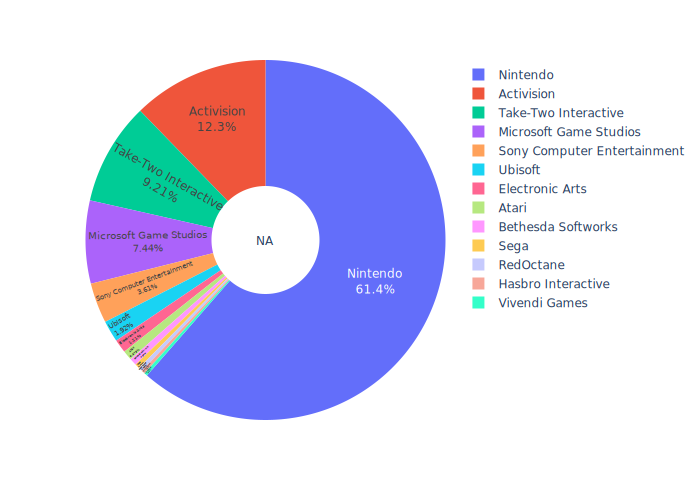

In [70]:
#북미
NA_top20_name = plex.bar(x=top20_NA.NA_Sales,y=top20_NA.Name)
NA_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='North America Sales(Million)')
                       ,yaxis_title=dict(text=''))
NA_top20_name.show()
NA_top100_pub_pie = plex.pie(data_frame=top100_NA,hole=0.3,
                             values='Global_Sales',names='Publisher')
NA_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
NA_top100_pub_pie.update_layout(annotations=[dict(text='NA',showarrow=False)])
NA_top100_pub_pie.show()

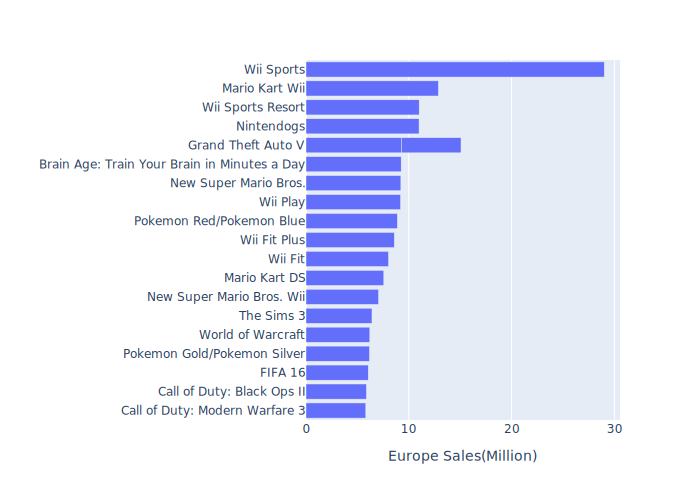

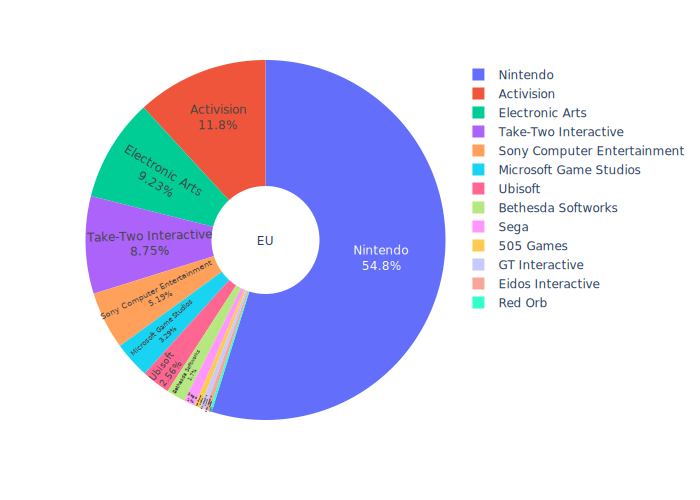

In [71]:
#유럽
EU_top20_name = plex.bar(x=top20_EU.EU_Sales,y=top20_EU.Name)
EU_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Europe Sales(Million)')
                       ,yaxis_title=dict(text=''))
EU_top20_name.show()
EU_top100_pub_pie = plex.pie(data_frame=top100_EU,hole=0.3,
                             values='Global_Sales',names='Publisher')
EU_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
EU_top100_pub_pie.update_layout(annotations=[dict(text='EU',showarrow=False)])
EU_top100_pub_pie.show()

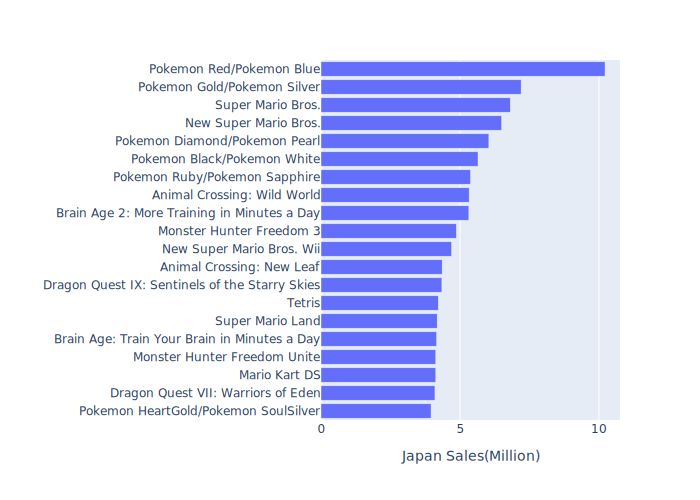

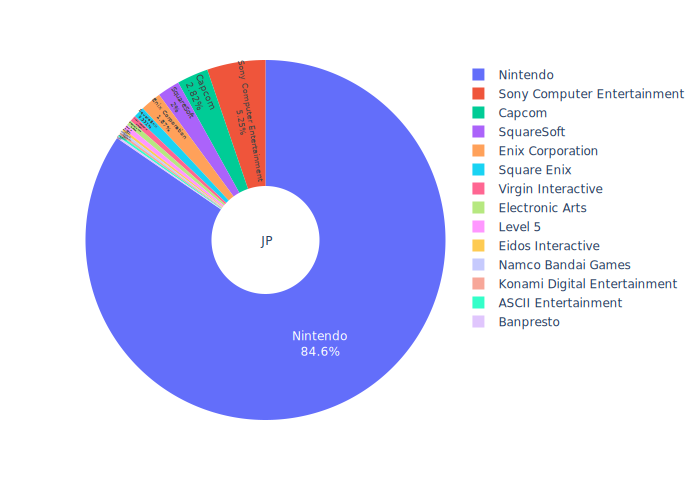

In [72]:
#일본
JP_top20_name = plex.bar(x=top20_JP.JP_Sales,y=top20_JP.Name)
JP_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Japan Sales(Million)')
                       ,yaxis_title=dict(text=''))
JP_top20_name.show()
JP_top100_pub_pie = plex.pie(data_frame=top100_JP,hole=0.3,
                             values='Global_Sales',names='Publisher')
JP_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
JP_top100_pub_pie.update_layout(annotations=[dict(text='JP',showarrow=False)])
JP_top100_pub_pie.show()

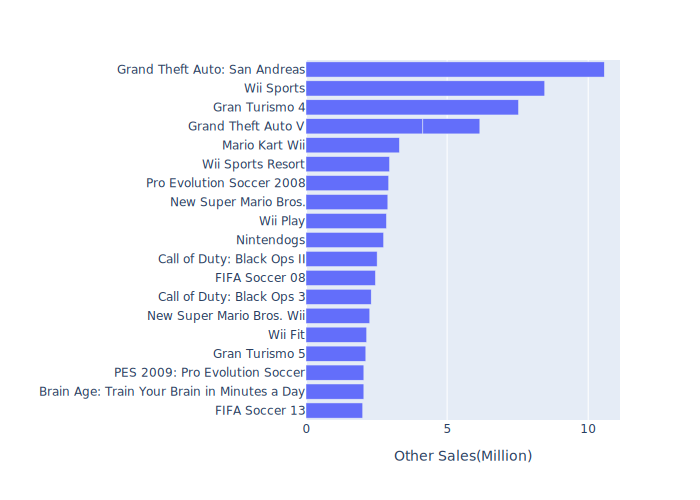

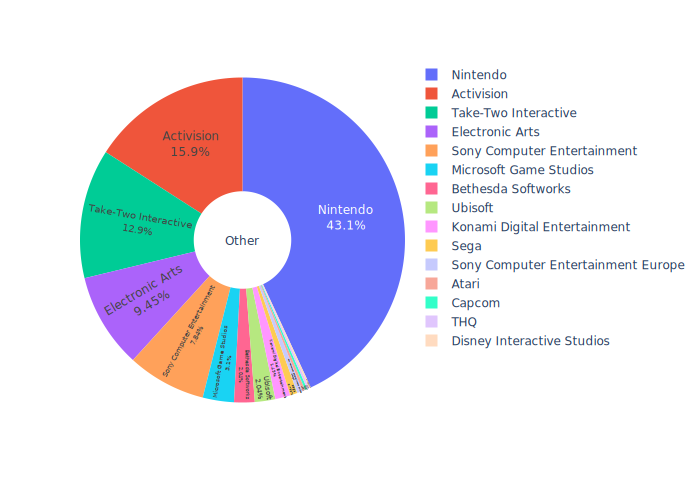

In [73]:
#그외
Ot_top20_name = plex.bar(x=top20_Ot.Other_Sales,y=top20_Ot.Name)
Ot_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Other Sales(Million)')
                       ,yaxis_title=dict(text=''))
Ot_top20_name.show()
Ot_top100_pub_pie = plex.pie(data_frame=top100_Ot,hole=0.3,
                             values='Global_Sales',names='Publisher')
Ot_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Ot_top100_pub_pie.update_layout(annotations=[dict(text='Other',showarrow=False)])
Ot_top100_pub_pie.show()

### 1-2. Genre Trend

##### Global Genre

In [74]:
df_Genre = vgames.groupby(['Genre'],as_index=False)[Sales_list].sum()
df_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,858.78,513.64,156.61,183.99,1713.02
1,Adventure,101.92,63.71,51.69,16.70,234.02
2,Fighting,220.35,99.90,85.72,36.15,442.12
3,Misc,400.29,210.20,104.09,72.74,787.32
4,Platform,444.38,200.29,130.40,51.40,826.47
5,Puzzle,121.58,50.48,56.22,12.44,240.72
6,Racing,354.70,235.03,56.25,76.51,722.49
7,Role-Playing,318.76,183.10,341.62,56.73,900.21
8,Shooter,574.48,310.23,38.16,101.86,1024.73
9,Simulation,181.43,113.17,63.52,31.32,389.44


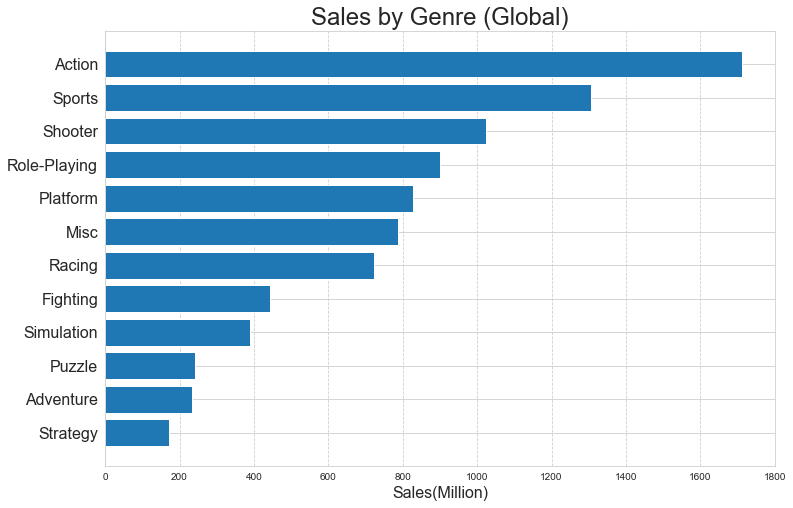

In [75]:
#global barplot
Genre_sort = df_Genre.sort_values(by='Global_Sales',ascending=True).reset_index(drop=True)
plot_index = np.arange(len(Genre_sort.Genre))
plt.figure(figsize=(12,8))
plt.barh(plot_index,Genre_sort.Global_Sales)
plt.title('Sales by Genre (Global)',fontsize=24)
plt.xlabel('Sales(Million)',fontsize=16)
plt.ylabel('')
plt.yticks(plot_index,Genre_sort.Genre,fontsize=16)
plt.grid(True,axis='x',linestyle='--')
plt.xlim([0,1800])
plt.show()

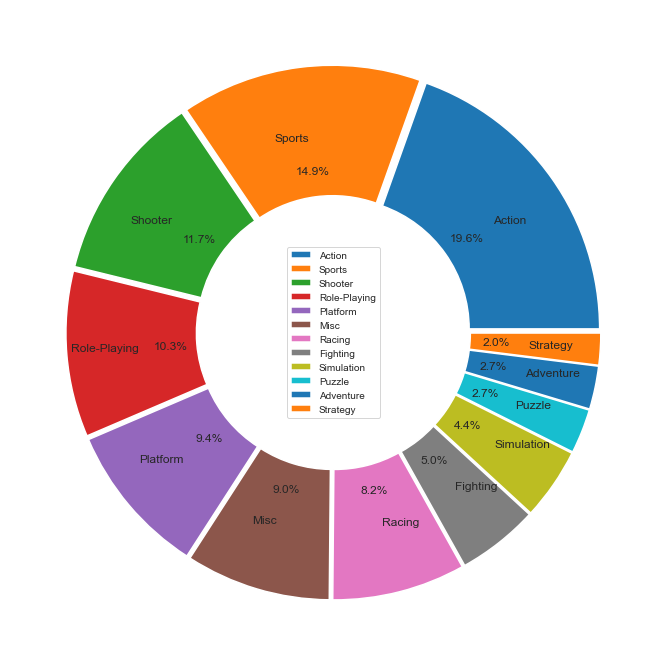

In [76]:
#Global pie chart
explode = np.repeat(0.025,12)
wedgeprops = {'width': 0.5, 'edgecolor': 'w', 'linewidth': 1.5}
textprops={'size':12}
Genre_sort2 = df_Genre.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,12))
plt.pie(Genre_sort2.Global_Sales,labels=Genre_sort2.Genre,labeldistance=0.725,startangle=0,autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops,textprops=textprops)
plt.legend(loc='center')
plt.show()

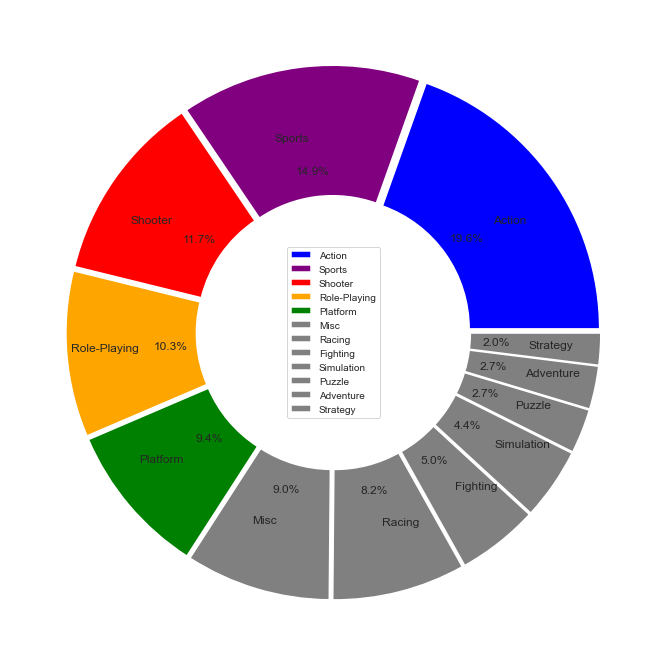

In [77]:
#Top5 color 적용
color_top5 = ['blue','purple','red','orange','green','gray','gray','gray','gray','gray','gray','gray']
plt.figure(figsize=(12,12))
plt.pie(Genre_sort2.Global_Sales,labels=Genre_sort2.Genre,
        labeldistance=0.725,startangle=0,autopct='%.1f%%',
        explode=explode,wedgeprops=wedgeprops,textprops=textprops,
        colors=color_top5)
plt.legend(loc='center')
plt.show()

##### 지역별 Genre

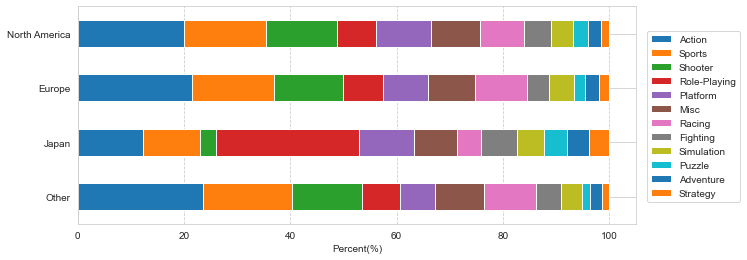

In [78]:
#지역별 stack barplot
Genre_sort2 = df_Genre.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
genre_stack = Genre_sort2.iloc[:,:-1].T.iloc[1:,:]
genre_stack.columns = Genre_sort2.Genre
genre_per = genre_stack.div(genre_stack.sum(axis=1),axis=0)*100
genre_per_ud = genre_per.loc[::-1]
genre_per_ud.index = ['Other','Japan','Europe','North America']
genre_per_ud.plot(kind = 'barh',stacked='True',figsize=(10,4))
plt.grid(True,axis='x',linestyle='--')
plt.xlabel('Percent(%)')
plt.legend(loc=(1.02,0.1))
plt.show();

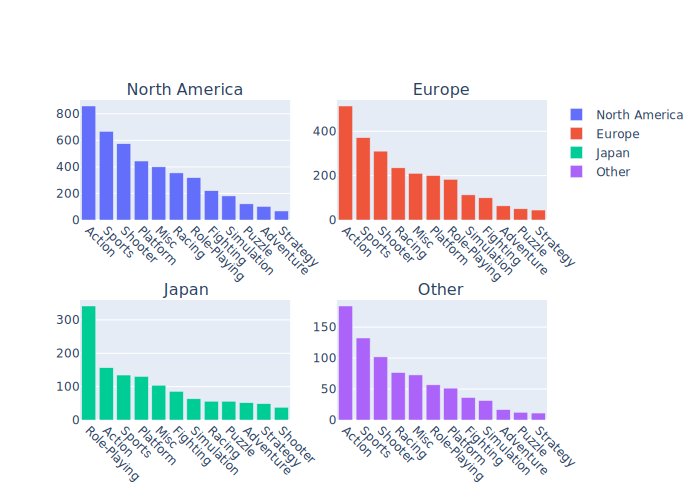

In [79]:
#지역별 barplot
Genre_NA = df_Genre.sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)
Genre_EU = df_Genre.sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)
Genre_JP = df_Genre.sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)
Genre_Ot = df_Genre.sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

region_genre = plsub(rows=2,cols=2,subplot_titles=('North America','Europe','Japan','Other'))
region_genre.add_bar(x= Genre_NA.Genre,y=Genre_NA.NA_Sales,name='North America',row=1,col=1)
region_genre.add_bar(x= Genre_EU.Genre,y=Genre_EU.EU_Sales,name='Europe',row=1,col=2)
region_genre.add_bar(x= Genre_JP.Genre,y=Genre_JP.JP_Sales,name='Japan',row=2,col=1)
region_genre.add_bar(x= Genre_Ot.Genre,y=Genre_Ot.Other_Sales,name='Other',row=2,col=2)
region_genre.update_xaxes(tickangle= 45)
region_genre.show()

##### 연도(세대)별 Genre(all)

In [80]:
df_genre_year = vgames.groupby(['Year','Genre'],as_index=False).sum()
df_genre_year

,Year,Genre,Generation,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Action,2,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,2,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,8,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,4,6.56,0.43,0.00,0.08,7.07
4,1981,Action,50,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...,...
383,2016,Sports,293,4.57,7.36,0.78,1.92,14.63
384,2016,Strategy,80,0.11,0.32,0.05,0.04,0.52
385,2017,Action,8,0.00,0.00,0.01,0.00,0.01
386,2017,Role-Playing,16,0.00,0.00,0.04,0.00,0.04


In [81]:
df_genre_gen = vgames.groupby(['Generation','Genre'],as_index=False).sum()
df_genre_gen

,Generation,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Action,109013,24.63,1.47,0.00,0.21,26.31
1,2,Adventure,1983,0.38,0.02,0.00,0.00,0.40
2,2,Fighting,1980,0.72,0.04,0.00,0.01,0.77
3,2,Misc,9902,3.34,0.20,0.00,0.03,3.57
4,2,Platform,17836,12.38,0.72,0.00,0.16,13.26
...,...,...,...,...,...,...,...,...
76,8,Role-Playing,503532,34.23,27.39,46.78,8.41,116.81
77,8,Shooter,213535,66.13,55.17,4.45,18.08,143.83
78,8,Simulation,106726,8.71,12.49,10.54,2.05,33.79
79,8,Sports,290020,37.21,36.05,4.43,11.57,89.26


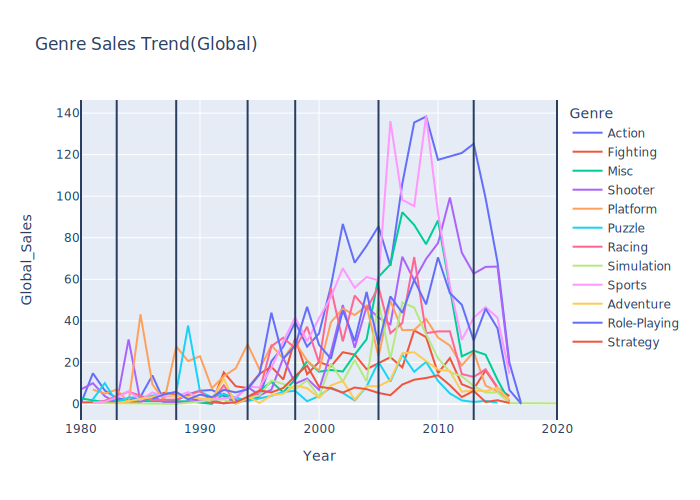

In [82]:
year_genre = plex.line(data_frame=df_genre_year,x='Year',y='Global_Sales',color='Genre',title='Genre Sales Trend(Global)')
year_genre.add_vline(1980)
year_genre.add_vline(1983)
year_genre.add_vline(1988)
year_genre.add_vline(1994)
year_genre.add_vline(1998)
year_genre.add_vline(2005)
year_genre.add_vline(2013)
year_genre.add_vline(2020)
year_genre.show()

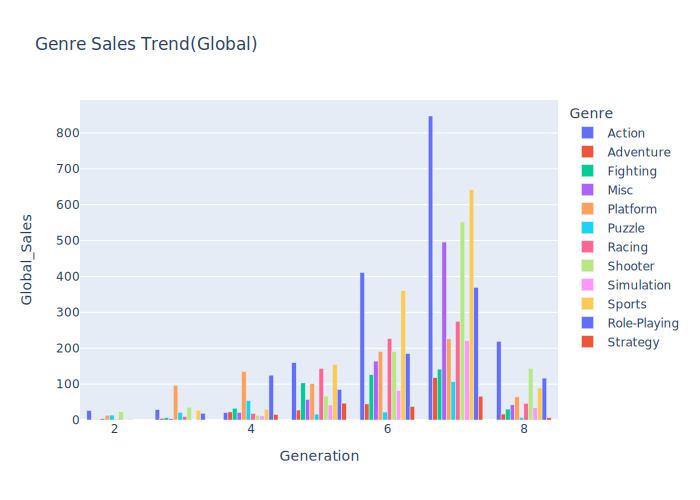

In [83]:
gen_genre = plex.bar(data_frame=df_genre_gen,x='Generation',y='Global_Sales',
                           color='Genre',title='Genre Sales Trend(Global)',
                           barmode='group')
gen_genre.show()

##### 연도(세대)별 Genre(TOP5)

In [84]:
top5genre = ['Action','Sports','Shooter','Role-Playing','Platform']
df_top5_genre_year = df_genre_year[df_genre_year.Genre.isin(top5genre)]
df_top5_genre_year

,Year,Genre,Generation,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Action,2,0.32,0.02,0.00,0.00,0.34
3,1980,Shooter,4,6.56,0.43,0.00,0.08,7.07
4,1981,Action,50,13.86,0.81,0.00,0.12,14.79
5,1981,Platform,6,6.47,0.37,0.00,0.08,6.92
8,1981,Shooter,20,9.37,0.56,0.00,0.09,10.02
...,...,...,...,...,...,...,...,...
380,2016,Role-Playing,315,1.39,1.29,3.63,0.44,6.75
381,2016,Shooter,254,7.44,7.70,0.61,2.42,18.17
383,2016,Sports,293,4.57,7.36,0.78,1.92,14.63
385,2017,Action,8,0.00,0.00,0.01,0.00,0.01


In [85]:
df_top5_genre_gen = df_genre_gen[df_genre_gen.Genre.isin(top5genre)]
df_top5_genre_gen

,Generation,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Action,109013,24.63,1.47,0.00,0.21,26.31
4,2,Platform,17836,12.38,0.72,0.00,0.16,13.26
7,2,Shooter,43611,21.41,1.31,0.00,0.24,22.96
9,2,Sports,17848,2.14,0.12,0.00,0.02,2.28
10,3,Action,25836,16.31,3.34,8.65,0.45,28.75
14,3,Platform,55637,53.64,10.19,30.26,1.69,95.78
17,3,Role-Playing,21874,1.14,0.00,16.11,1.53,18.78
18,3,Shooter,13895,29.03,1.13,4.94,0.52,35.62
20,3,Sports,27820,7.00,2.12,17.43,0.29,26.84
21,4,Action,41873,10.02,3.99,6.20,0.54,20.75


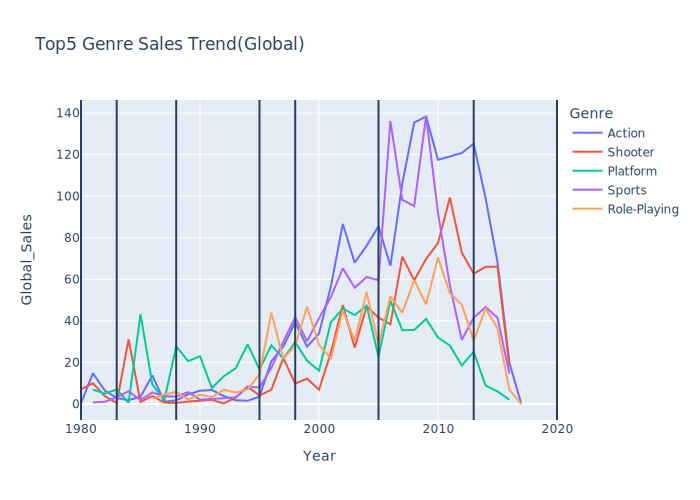

In [86]:
top5_year_genre = plex.line(data_frame=df_top5_genre_year,x='Year',y='Global_Sales',color='Genre',title='Top5 Genre Sales Trend(Global)')
top5_year_genre.add_vline(1980)
top5_year_genre.add_vline(1983)
top5_year_genre.add_vline(1988)
top5_year_genre.add_vline(1995)
top5_year_genre.add_vline(1998)
top5_year_genre.add_vline(2005)
top5_year_genre.add_vline(2013)
top5_year_genre.add_vline(2020)
top5_year_genre.show()

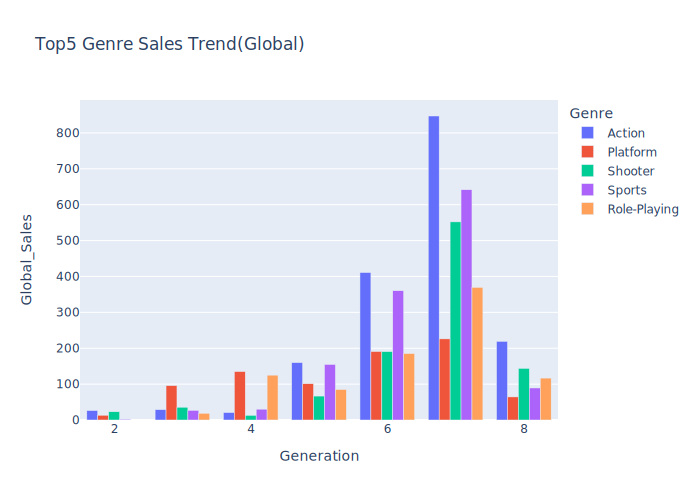

In [87]:
top5_gen_genre = plex.bar(data_frame=df_top5_genre_gen,
                          x='Generation',y='Global_Sales',
                          color='Genre',title='Top5 Genre Sales Trend(Global)',
                          barmode='group')
top5_gen_genre.show()

##### Genre별 최고매출

In [88]:
#매출 높은 게임 분석(장르)
top20_Action = vgames[vgames.Genre == 'Action'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_Sports = vgames[vgames.Genre == 'Sports'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_Shooter = vgames[vgames.Genre == 'Shooter'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_RolePlaying = vgames[vgames.Genre == 'Role-Playing'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_Platform = vgames[vgames.Genre == 'Platform'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top100_Action = vgames[vgames.Genre == 'Action'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_Sports = vgames[vgames.Genre == 'Sports'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_Shooter = vgames[vgames.Genre == 'Shooter'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_RolePlaying = vgames[vgames.Genre == 'Role-Playing'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_Platform = vgames[vgames.Genre == 'Platform'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)

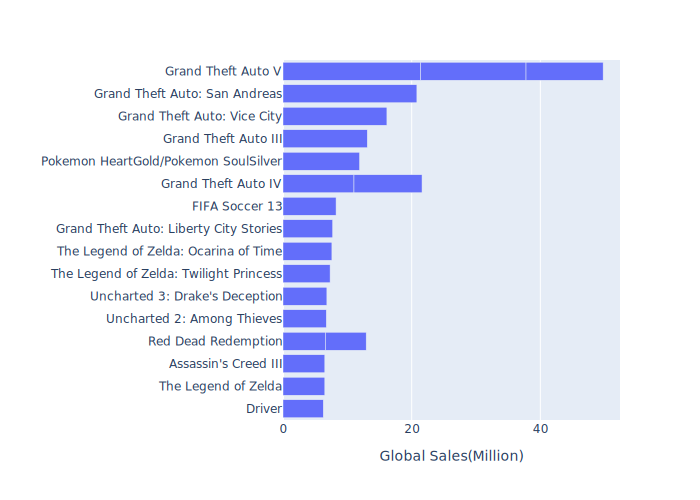

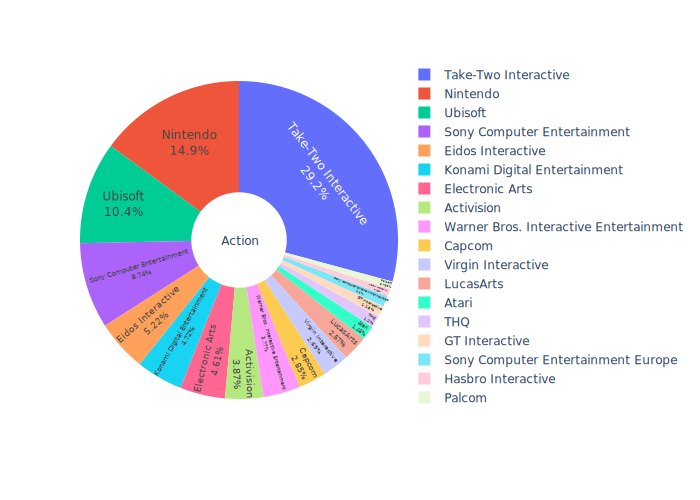

In [89]:
#Action
action_top20_name = plex.bar(x=top20_Action.Global_Sales,y=top20_Action.Name)
action_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
action_top20_name.show()
Action_top100_pub_pie = plex.pie(data_frame=top100_Action,hole=0.3,
                             values='Global_Sales',names='Publisher')
Action_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Action_top100_pub_pie.update_layout(annotations=[dict(text='Action',showarrow=False)])
Action_top100_pub_pie.show()

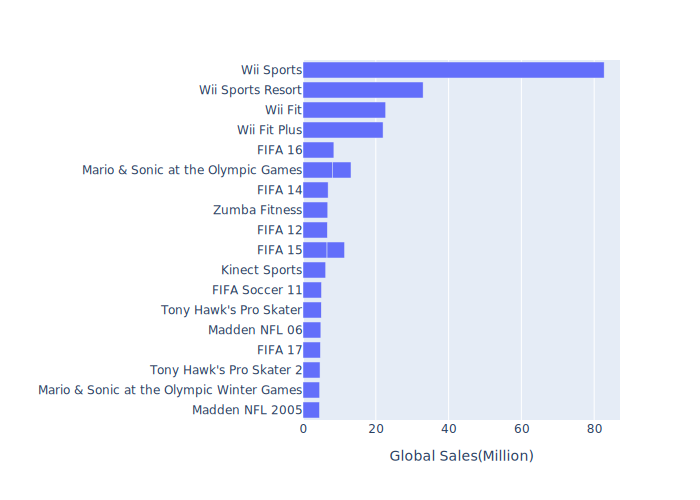

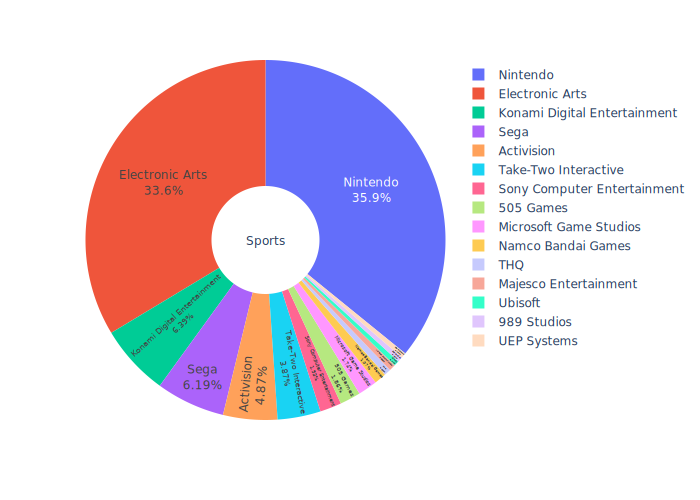

In [90]:
#Sports
sports_top20_name = plex.bar(x=top20_Sports.Global_Sales,y=top20_Sports.Name)
sports_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
sports_top20_name.show()
Sports_top100_pub_pie = plex.pie(data_frame=top100_Sports,hole=0.3,
                             values='Global_Sales',names='Publisher')
Sports_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Sports_top100_pub_pie.update_layout(annotations=[dict(text='Sports',showarrow=False)])
Sports_top100_pub_pie.show()

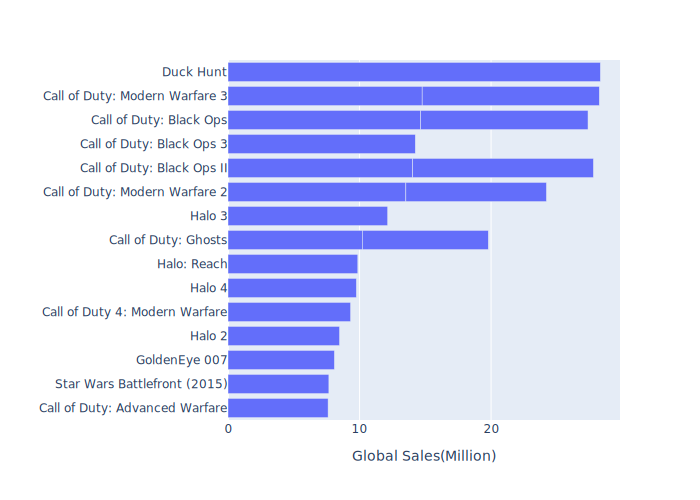

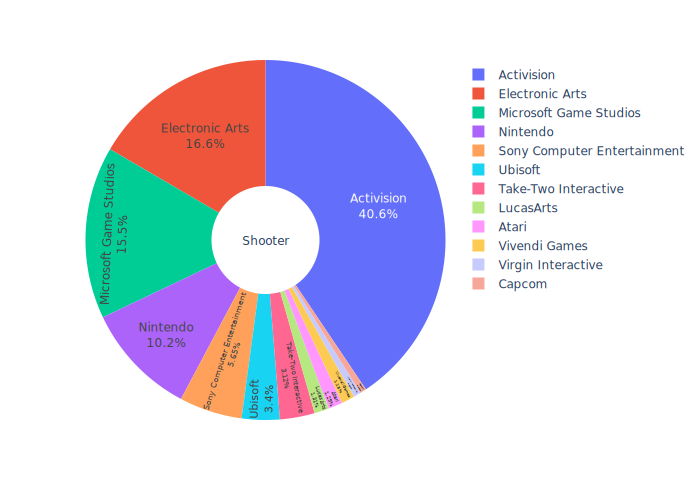

In [91]:
#Shooter
shooter_top20_name = plex.bar(x=top20_Shooter.Global_Sales,y=top20_Shooter.Name)
shooter_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
shooter_top20_name.show()
Shooter_top100_pub_pie = plex.pie(data_frame=top100_Shooter,hole=0.3,
                             values='Global_Sales',names='Publisher')
Shooter_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Shooter_top100_pub_pie.update_layout(annotations=[dict(text='Shooter',showarrow=False)])
Shooter_top100_pub_pie.show()

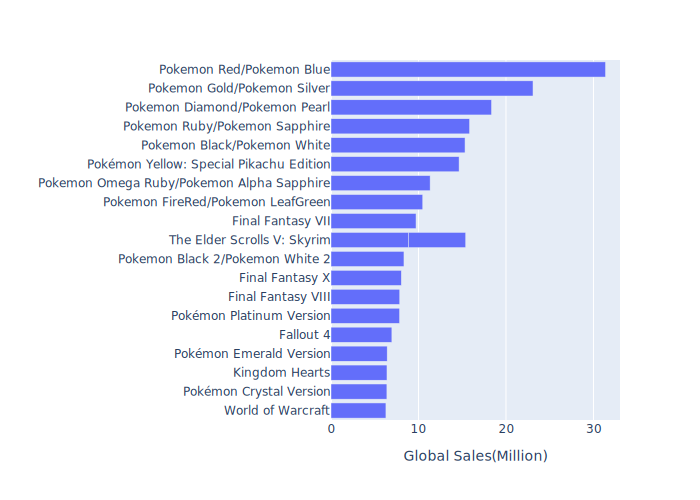

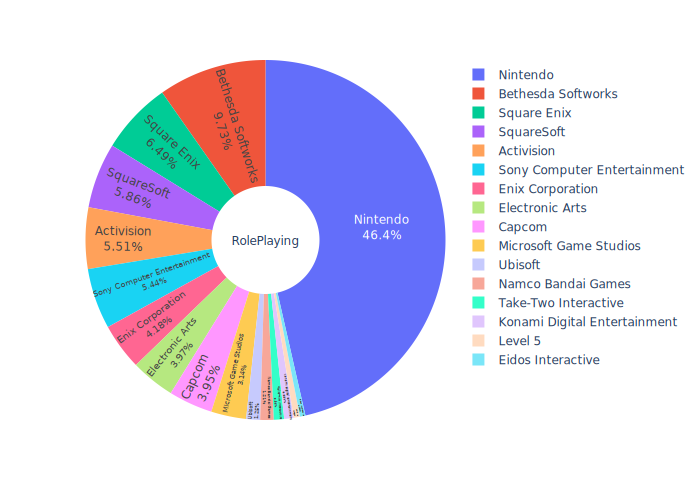

In [92]:
#Role-Playing
rpg_top20_name = plex.bar(x=top20_RolePlaying.Global_Sales,y=top20_RolePlaying.Name)
rpg_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
rpg_top20_name.show()
RolePlaying_top100_pub_pie = plex.pie(data_frame=top100_RolePlaying,hole=0.3,
                             values='Global_Sales',names='Publisher')
RolePlaying_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
RolePlaying_top100_pub_pie.update_layout(annotations=[dict(text='RolePlaying',showarrow=False)])
RolePlaying_top100_pub_pie.show()

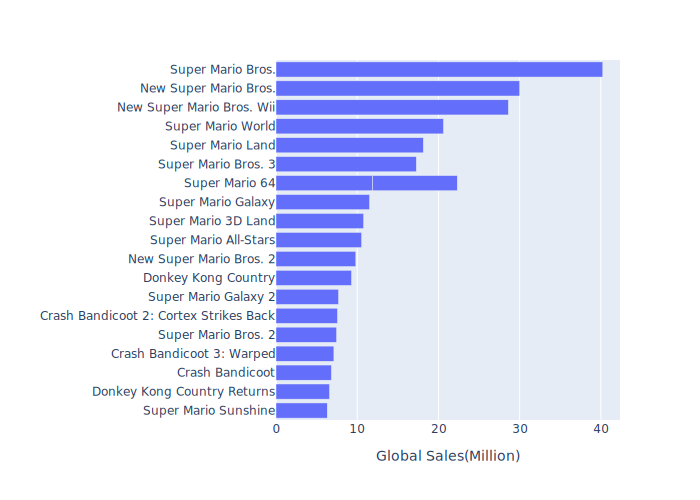

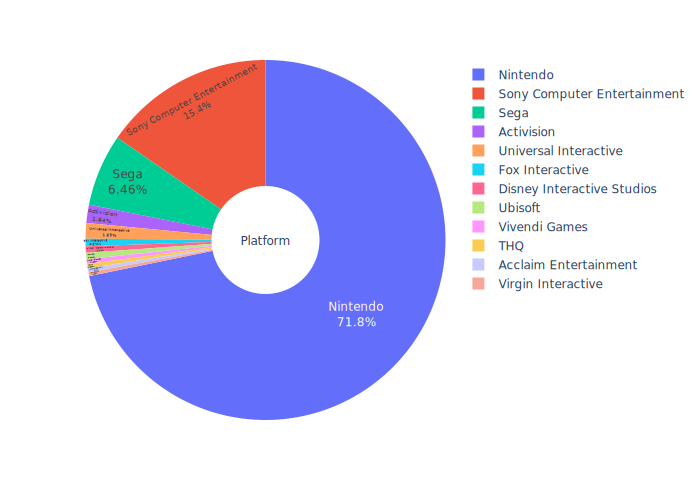

In [93]:
#platform
Platform_top20_name = plex.bar(x=top20_Platform.Global_Sales,y=top20_Platform.Name)
Platform_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
Platform_top20_name.show()
Platform_top100_pub_pie = plex.pie(data_frame=top100_Platform,hole=0.3,
                             values='Global_Sales',names='Publisher')
Platform_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Platform_top100_pub_pie.update_layout(annotations=[dict(text='Platform',showarrow=False)])
Platform_top100_pub_pie.show()

### 1-3. Platform Type Trend

##### Global Type

In [94]:
#platform type별 총 판매량
df_type = vgames.groupby(['Platform_type'],as_index=False)[Sales_list].sum()
df_type

,Platform_type,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PC,92.09,136.80,0.17,24.24,253.30
1,Portable,880.98,453.78,496.17,137.65,1968.58
2,Traditional,3338.75,1805.05,771.44,621.53,6536.77


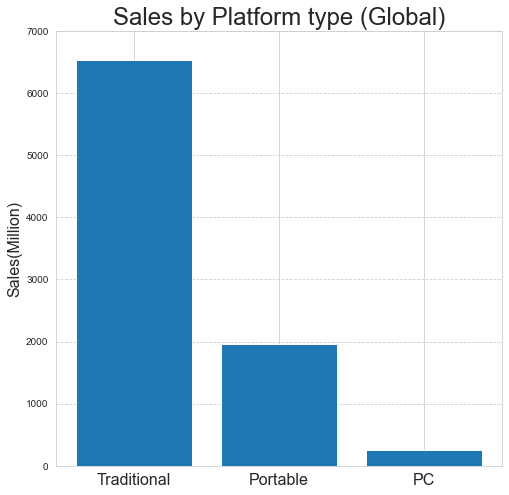

In [95]:
#global barplot
type_sort = df_type.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
type_index = np.arange(len(type_sort.Platform_type))
plt.figure(figsize=(8,8))
plt.bar(type_index,type_sort.Global_Sales)
plt.title('Sales by Platform type (Global)',fontsize=24)
plt.xlabel('')
plt.ylabel('Sales(Million)',fontsize=16)
plt.xticks(type_index,type_sort.Platform_type,fontsize=16)
plt.grid(True,axis='y',linestyle='--')
plt.ylim([0,7000])
plt.show()

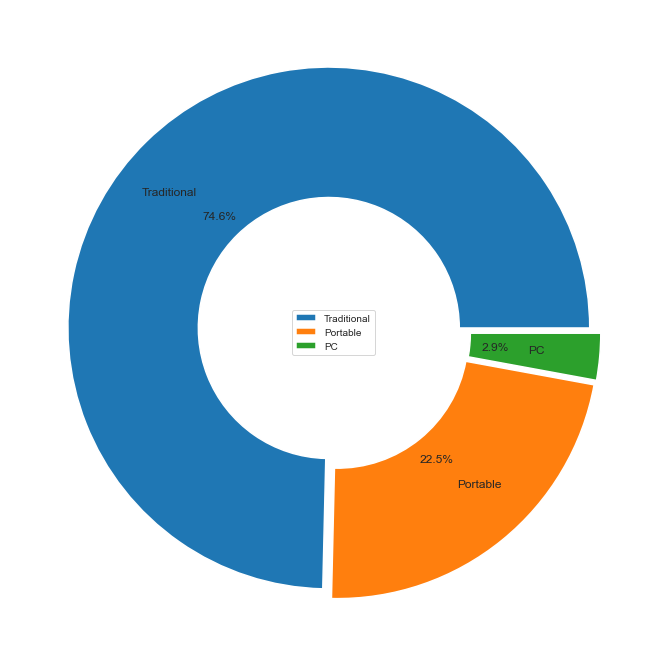

In [96]:
#Global pie chart
explode = np.repeat(0.025,3)
wedgeprops = {'width': 0.5, 'edgecolor': 'w', 'linewidth': 1.5}
textprops={'size':12}
type_sort2 = df_type.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,12))
plt.pie(type_sort2.Global_Sales,labels=type_sort2.Platform_type,labeldistance=0.725,startangle=0,autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops,textprops=textprops)
plt.legend(loc='center')
plt.show()

##### 지역별 Type

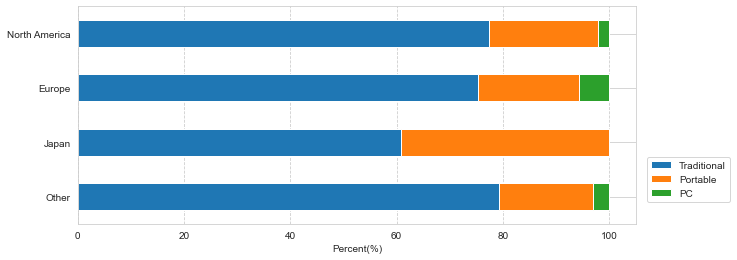

In [97]:
#지역별 stack barplot
type_stack = type_sort2.iloc[:,:-1].T.iloc[1:,:]
type_stack.columns = type_sort2.Platform_type
type_per = type_stack.div(type_stack.sum(axis=1),axis=0)*100
type_per_ud = type_per.loc[::-1]
type_per_ud.index = ['Other','Japan','Europe','North America']
type_per_ud.plot(kind = 'barh',stacked='True',figsize=(10,4))
plt.grid(True,axis='x',linestyle='--')
plt.xlabel('Percent(%)')
plt.legend(loc=(1.02,0.1))
plt.show();

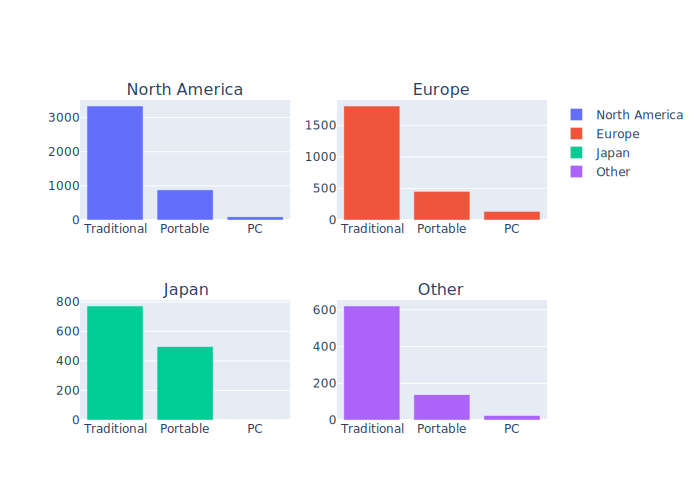

In [98]:
#지역별 barplot
type_NA = df_type.sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)
type_EU = df_type.sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)
type_JP = df_type.sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)
type_Ot = df_type.sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

region_type = plsub(rows=2,cols=2,subplot_titles=('North America','Europe','Japan','Other'))
region_type.add_bar(x= type_NA.Platform_type,y=type_NA.NA_Sales,name='North America',row=1,col=1)
region_type.add_bar(x= type_EU.Platform_type,y=type_EU.EU_Sales,name='Europe',row=1,col=2)
region_type.add_bar(x= type_JP.Platform_type,y=type_JP.JP_Sales,name='Japan',row=2,col=1)
region_type.add_bar(x= type_Ot.Platform_type,y=type_Ot.Other_Sales,name='Other',row=2,col=2)
region_type.update_xaxes(tickangle= 0)
region_type.show()

##### 연도(세대)별 Type

In [99]:
df_type_year = vgames.groupby(['Year','Platform_type'],as_index=False).sum()
df_type_year

,Year,Platform_type,Generation,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Traditional,16,10.13,0.64,0.00,0.11,10.88
1,1981,Traditional,92,33.40,1.96,0.00,0.32,35.68
2,1982,Traditional,72,26.92,1.65,0.00,0.31,28.88
3,1983,Traditional,40,7.76,0.80,8.10,0.14,16.80
4,1984,Traditional,41,33.28,2.10,14.27,0.70,50.35
...,...,...,...,...,...,...,...,...
90,2016,Portable,760,1.02,0.87,7.78,0.26,9.93
91,2016,Traditional,1648,20.80,24.30,5.92,7.32,58.34
92,2017,Portable,16,0.00,0.00,0.02,0.00,0.02
93,2017,Traditional,8,0.00,0.00,0.03,0.00,0.03


In [100]:
df_type_gen = vgames.groupby(['Generation','Platform_type'],as_index=False).sum()
df_type_gen

,Generation,Platform_type,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Traditional,227948,80.32,4.83,0.00,0.83,85.98
1,3,PC,3973,0.00,0.05,0.00,0.02,0.07
2,3,Traditional,194741,125.94,21.15,98.65,5.31,251.05
3,4,PC,21924,6.79,8.51,0.00,0.57,15.87
4,4,Portable,193608,113.64,47.51,85.12,8.16,254.43
5,4,Traditional,530341,80.50,24.56,119.22,4.11,228.39
6,5,PC,39940,19.08,9.34,0.09,0.83,29.34
7,5,Traditional,3338484,472.85,252.96,204.82,44.88,975.51
8,6,PC,298454,22.94,22.09,0.08,2.06,47.17
9,6,Portable,1620601,183.95,74.53,46.56,7.61,312.65


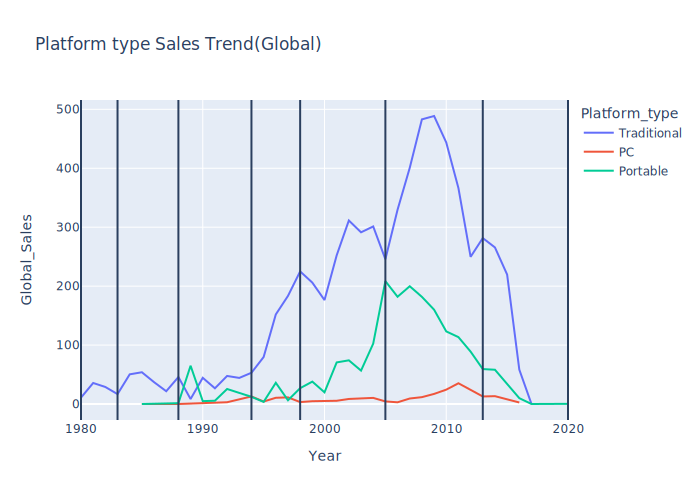

In [101]:
year_type = plex.line(data_frame=df_type_year,x='Year',y='Global_Sales',color='Platform_type',title='Platform type Sales Trend(Global)')
year_type.add_vline(1980)
year_type.add_vline(1983)
year_type.add_vline(1988)
year_type.add_vline(1994)
year_type.add_vline(1998)
year_type.add_vline(2005)
year_type.add_vline(2013)
year_type.add_vline(2020)
year_type.show()

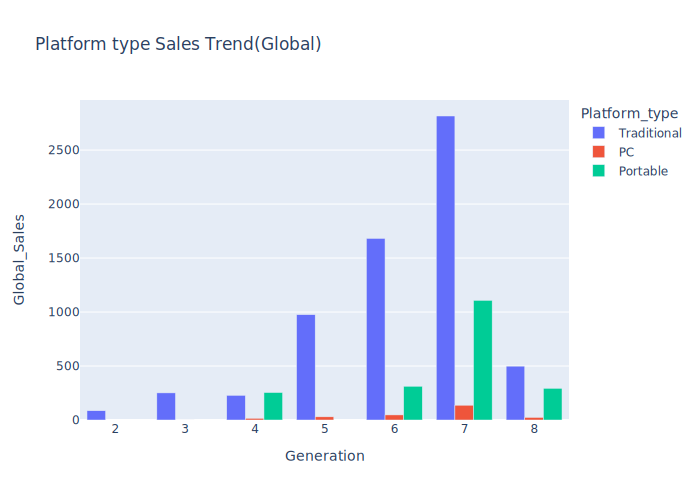

In [102]:
gen_type = plex.bar(data_frame=df_type_gen,
                    x='Generation',y='Global_Sales',
                    color='Platform_type',title='Platform type Sales Trend(Global)',
                    barmode='group')
gen_type.show()

##### Type별 최고매출

In [103]:
#매출 높은 게임 분석(플랫폼type)
top20_port = vgames[vgames.Platform_type == 'Portable'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_trad = vgames[vgames.Platform_type == 'Traditional'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_pc = vgames[vgames.Platform_type == 'PC'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top100_port = vgames[vgames.Platform_type == 'Portable'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_trad = vgames[vgames.Platform_type == 'Traditional'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_pc = vgames[vgames.Platform_type == 'PC'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)

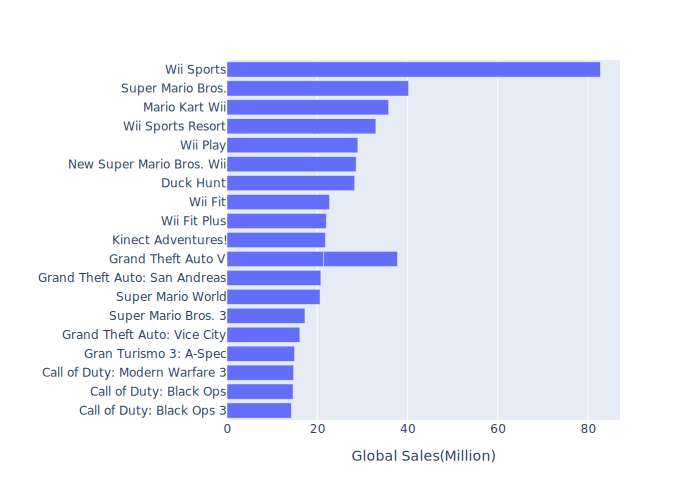

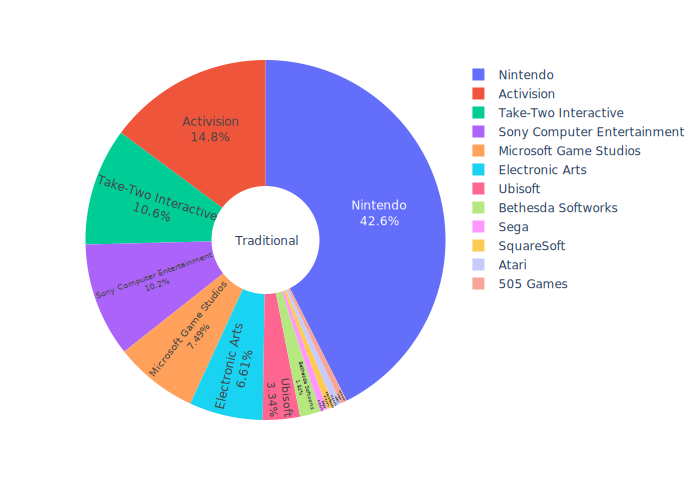

In [104]:
#traditional
trad_top20_name = plex.bar(x=top20_trad.Global_Sales,y=top20_trad.Name)
trad_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
trad_top20_name.show()
trad_top100_pub_pie = plex.pie(data_frame=top100_trad,hole=0.3,
                             values='Global_Sales',names='Publisher')
trad_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
trad_top100_pub_pie.update_layout(annotations=[dict(text='Traditional',showarrow=False)])
trad_top100_pub_pie.show()

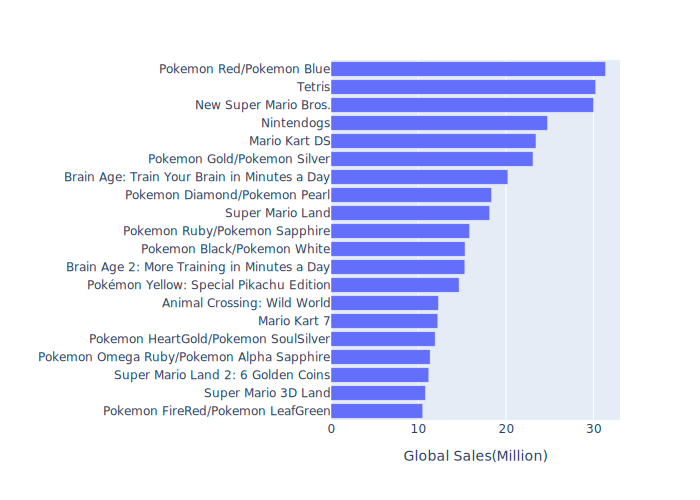

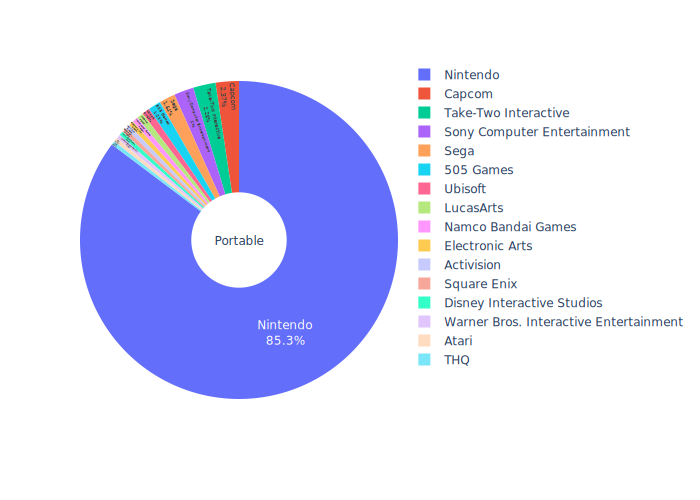

In [105]:
#portable
port_top20_name = plex.bar(x=top20_port.Global_Sales,y=top20_port.Name)
port_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
port_top20_name.show()
port_top100_pub_pie = plex.pie(data_frame=top100_port,hole=0.3,
                             values='Global_Sales',names='Publisher')
port_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
port_top100_pub_pie.update_layout(annotations=[dict(text='Portable',showarrow=False)])
port_top100_pub_pie.show()

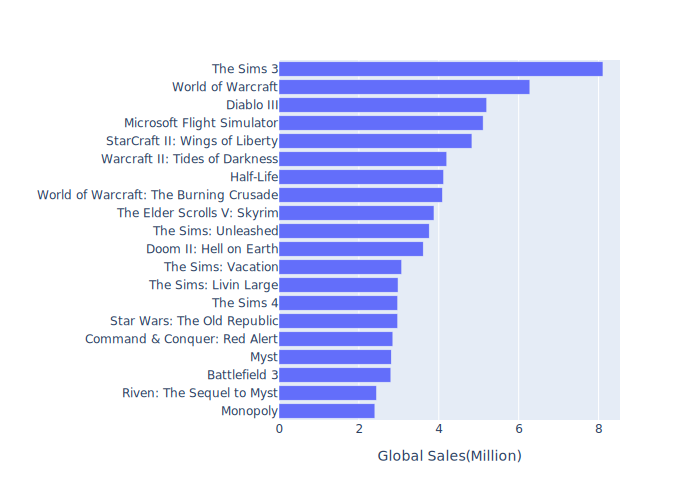

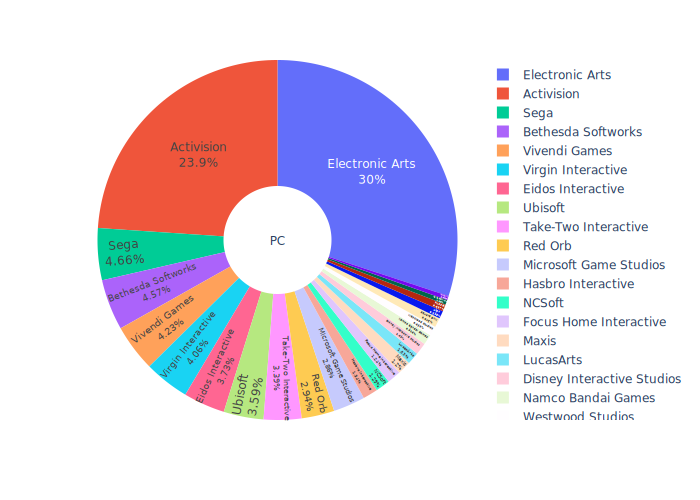

In [106]:
#pc
pc_top20_name = plex.bar(x=top20_pc.Global_Sales,y=top20_pc.Name)
pc_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
pc_top20_name.show()
pc_top100_pub_pie = plex.pie(data_frame=top100_pc,hole=0.3,
                             values='Global_Sales',names='Publisher')
pc_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
pc_top100_pub_pie.update_layout(annotations=[dict(text='PC',showarrow=False)])
pc_top100_pub_pie.show()

### 1-4. Platform Company Trend

##### Global Company

In [107]:
#platform company별 총 판매량
df_company = vgames.groupby(['Platform_company'],as_index=False)[Sales_list].sum()
df_company

,Platform_company,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Atari,80.32,4.83,0.00,0.83,85.98
1,Microsoft,856.21,381.91,14.01,104.85,1356.98
2,Nintendo,1749.08,774.50,747.76,190.62,3461.96
3,PC,92.09,136.80,0.17,24.24,253.30
4,Sega,25.42,7.75,43.49,1.23,77.89
5,Sony,1508.70,1089.84,462.35,461.65,3522.54


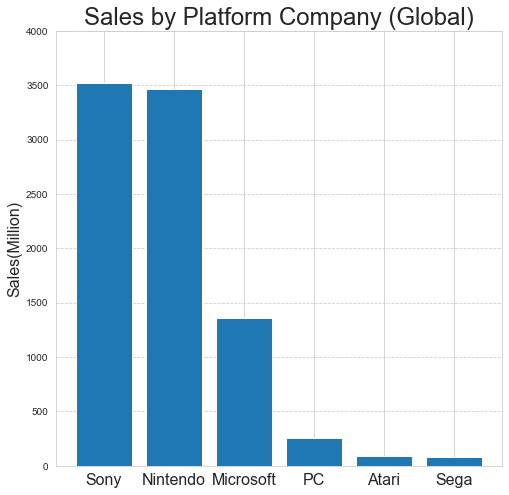

In [108]:
#global barplot
company_sort = df_company.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
company_index = np.arange(len(company_sort.Platform_company))
plt.figure(figsize=(8,8))
plt.bar(company_index,company_sort.Global_Sales)
plt.title('Sales by Platform Company (Global)',fontsize=24)
plt.xlabel('')
plt.ylabel('Sales(Million)',fontsize=16)
plt.xticks(company_index,company_sort.Platform_company,fontsize=16)
plt.grid(True, axis='y',linestyle='--')
plt.ylim([0,4000])
plt.show()

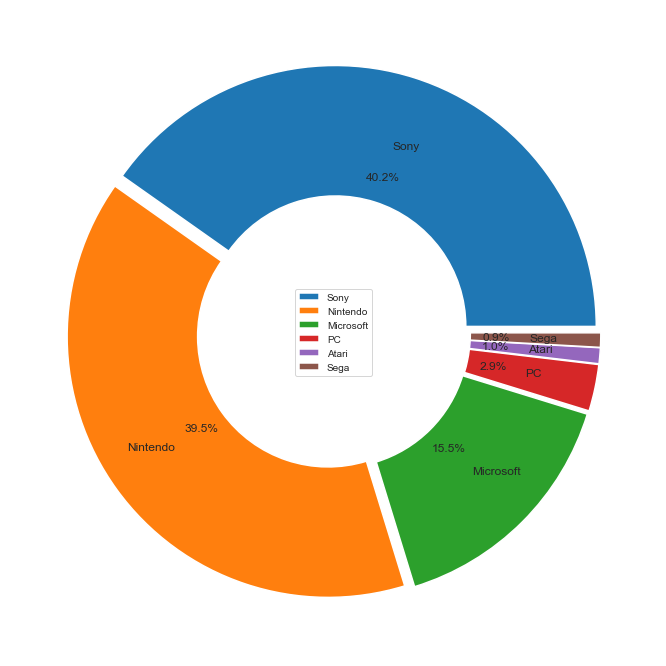

In [109]:
#Global pie chart
explode = np.repeat(0.025,6)
wedgeprops = {'width': 0.5, 'edgecolor': 'w', 'linewidth': 1.5}
textprops={'size':12}
company_sort2 = df_company.sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,12))
plt.pie(company_sort2.Global_Sales,labels=company_sort2.Platform_company,labeldistance=0.725,startangle=0,autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops,textprops=textprops)
plt.legend(loc='center')
plt.show()

##### 지역별 Company

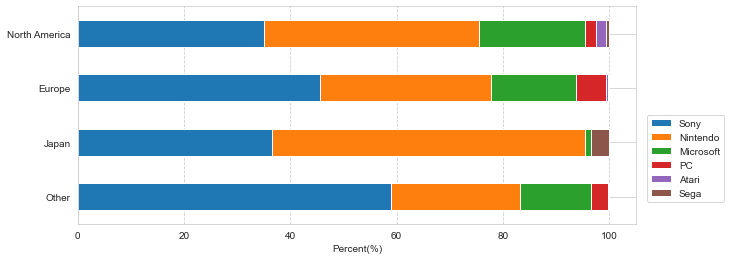

In [110]:
#지역별 stack barplot
company_stack = company_sort2.iloc[:,:-1].T.iloc[1:,:]
company_stack.columns = company_sort2.Platform_company
company_per = company_stack.div(company_stack.sum(axis=1),axis=0)*100
company_per_ud = company_per.loc[::-1]
company_per_ud.index = ['Other','Japan','Europe','North America']
company_per_ud.plot(kind = 'barh',stacked='True',figsize=(10,4))
plt.grid(True,axis='x',linestyle='--')
plt.xlabel('Percent(%)')
plt.legend(loc=(1.02,0.1))
plt.show();

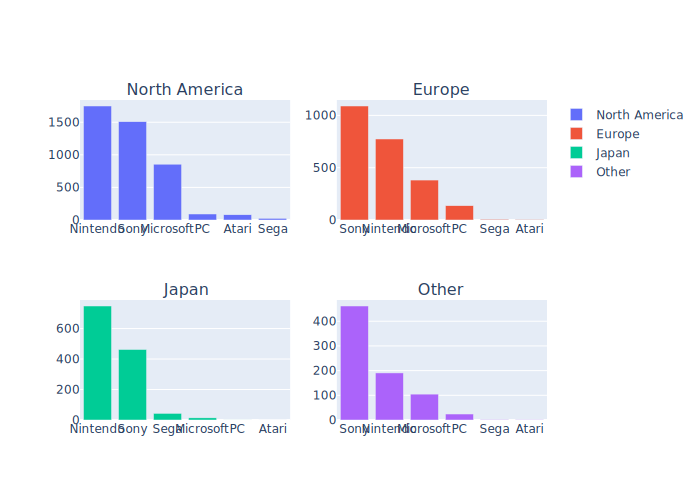

In [111]:
#지역별 barplot
company_NA = df_company.sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)
company_EU = df_company.sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)
company_JP = df_company.sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)
company_Ot = df_company.sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

region_company = plsub(rows=2,cols=2,subplot_titles=('North America','Europe','Japan','Other'))
region_company.add_bar(x= company_NA.Platform_company,y=company_NA.NA_Sales,name='North America',row=1,col=1)
region_company.add_bar(x= company_EU.Platform_company,y=company_EU.EU_Sales,name='Europe',row=1,col=2)
region_company.add_bar(x= company_JP.Platform_company,y=company_JP.JP_Sales,name='Japan',row=2,col=1)
region_company.add_bar(x= company_Ot.Platform_company,y=company_Ot.Other_Sales,name='Other',row=2,col=2)
region_company.update_xaxes(tickangle= 0)
region_company.show()

##### 연도(세대)별 Company

In [112]:
df_company_year = vgames.groupby(['Year','Platform_company'],as_index=False).sum()
df_company_year

,Year,Platform_company,Generation,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Atari,16,10.13,0.64,0.00,0.11,10.88
1,1981,Atari,92,33.40,1.96,0.00,0.32,35.68
2,1982,Atari,72,26.92,1.65,0.00,0.31,28.88
3,1983,Atari,22,5.44,0.34,0.00,0.06,5.84
4,1983,Nintendo,18,2.32,0.46,8.10,0.08,10.96
...,...,...,...,...,...,...,...,...
122,2016,Nintendo,360,2.32,1.56,5.58,0.37,9.83
123,2016,PC,304,0.84,1.59,0.00,0.17,2.60
124,2016,Sony,1560,12.45,18.58,8.11,6.09,45.23
125,2017,Sony,24,0.00,0.00,0.05,0.00,0.05


In [113]:
df_company_gen = vgames.groupby(['Generation','Platform_company'],as_index=False).sum()
df_company_gen

,Generation,Platform_company,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Atari,227948,80.32,4.83,0.00,0.83,85.98
1,3,Nintendo,194741,125.94,21.15,98.65,5.31,251.05
2,3,PC,3973,0.00,0.05,0.00,0.02,0.07
3,4,Nintendo,670137,174.87,66.55,201.67,11.38,454.47
4,4,PC,21924,6.79,8.51,0.00,0.57,15.87
5,4,Sega,53812,19.27,5.52,2.67,0.89,28.35
6,5,Nintendo,625540,138.34,40.67,33.47,4.28,216.76
7,5,PC,39940,19.08,9.34,0.09,0.83,29.34
8,5,Sega,345313,0.72,0.54,32.26,0.07,33.59
9,5,Sony,2367631,333.79,211.75,139.09,40.53,725.16


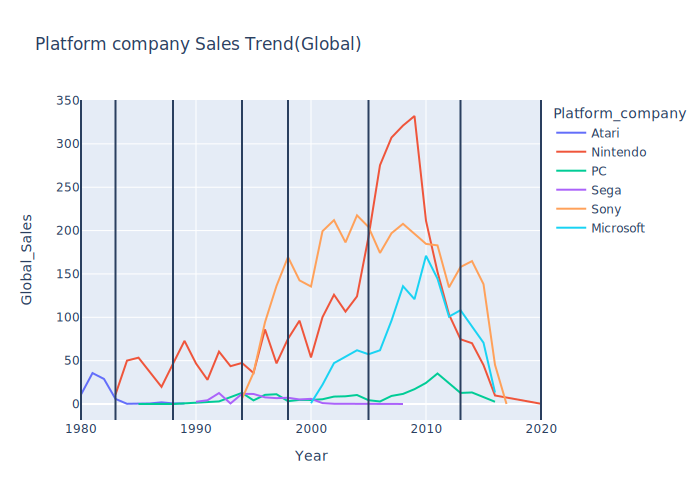

In [114]:
year_company = plex.line(data_frame=df_company_year,x='Year',y='Global_Sales',color='Platform_company',title='Platform company Sales Trend(Global)')
year_company.add_vline(1980)
year_company.add_vline(1983)
year_company.add_vline(1988)
year_company.add_vline(1994)
year_company.add_vline(1998)
year_company.add_vline(2005)
year_company.add_vline(2013)
year_company.add_vline(2020)
year_company.show()

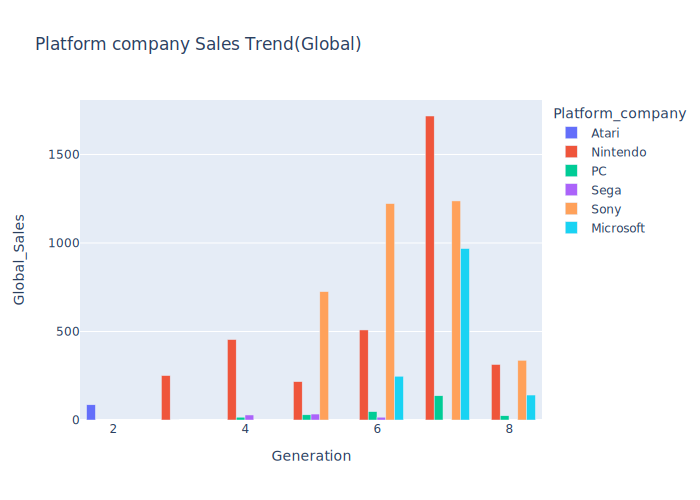

In [115]:
gen_company = plex.bar(data_frame=df_company_gen,
                       x='Generation',y='Global_Sales',
                       color='Platform_company',title='Platform company Sales Trend(Global)',
                       barmode='group')
gen_company.show()

##### TOP3 Company 최고매출

In [116]:
#매출 높은 게임 분석(플랫폼회사)
top20_nd = vgames[vgames.Platform_company == 'Nintendo'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_sony = vgames[vgames.Platform_company == 'Sony'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_ms = vgames[vgames.Platform_company == 'Microsoft'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top100_nd = vgames[vgames.Platform_company == 'Nintendo'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_sony = vgames[vgames.Platform_company == 'Sony'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_ms = vgames[vgames.Platform_company == 'Microsoft'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)

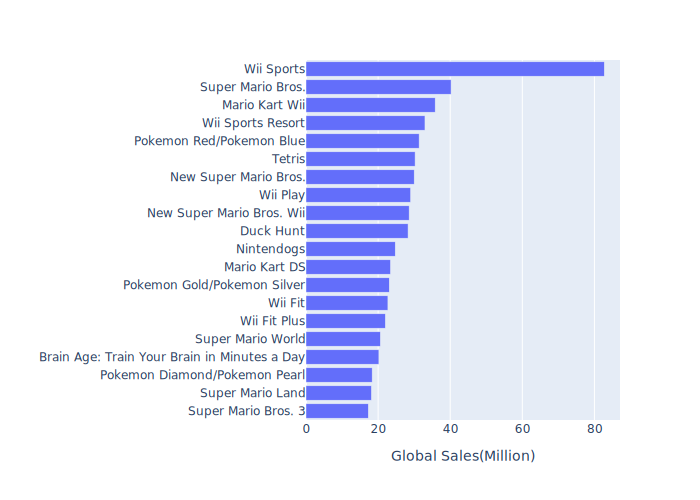

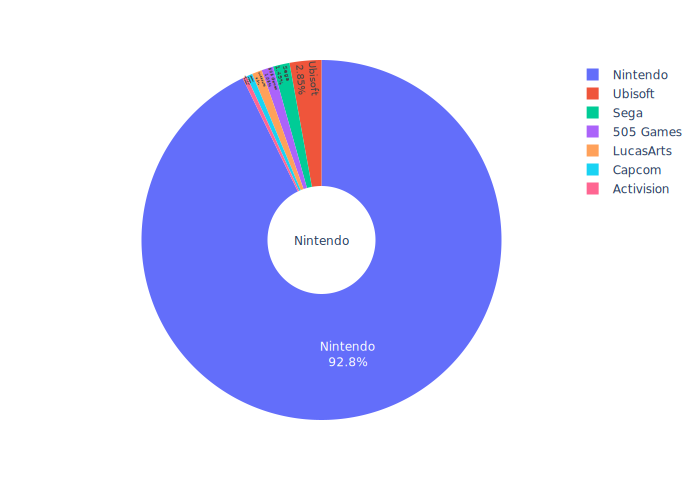

In [117]:
#닌텐도
ntd_top20_name = plex.bar(x=top20_nd.Global_Sales,y=top20_nd.Name)
ntd_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
ntd_top20_name.show()
nd_top100_pub_pie = plex.pie(data_frame=top100_nd,hole=0.3,
                             values='Global_Sales',names='Publisher')
nd_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
nd_top100_pub_pie.update_layout(annotations=[dict(text='Nintendo',showarrow=False)])
nd_top100_pub_pie.show()

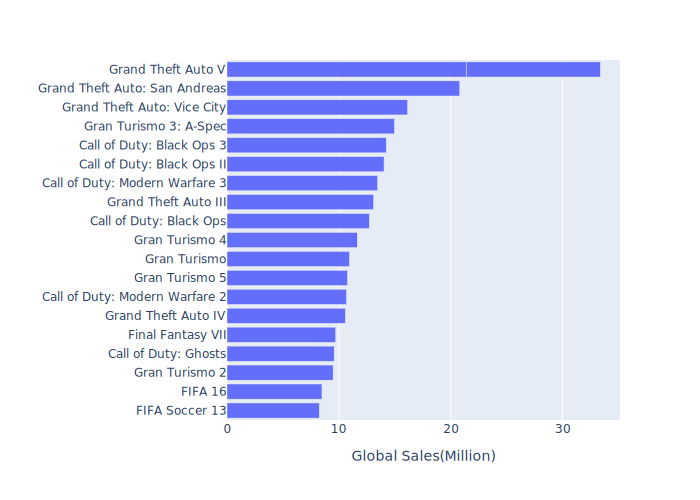

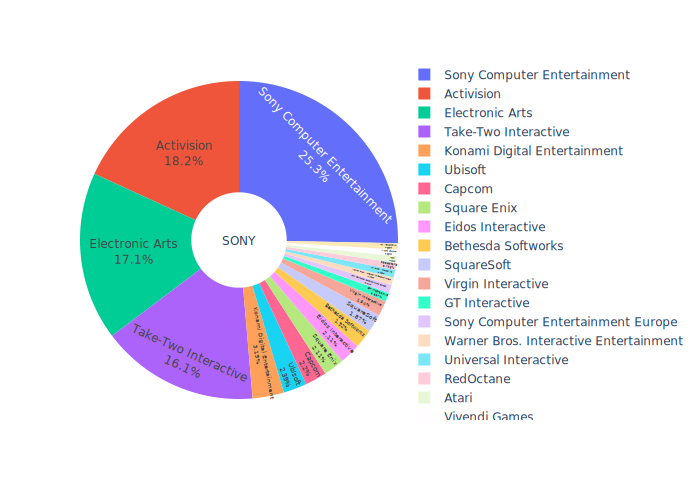

In [118]:
#sony
sony_top20_name = plex.bar(x=top20_sony.Global_Sales,y=top20_sony.Name)
sony_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
sony_top20_name.show()
sony_top100_pub_pie = plex.pie(data_frame=top100_sony,hole=0.3,
                             values='Global_Sales',names='Publisher')
sony_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
sony_top100_pub_pie.update_layout(annotations=[dict(text='SONY',showarrow=False)])
sony_top100_pub_pie.show()

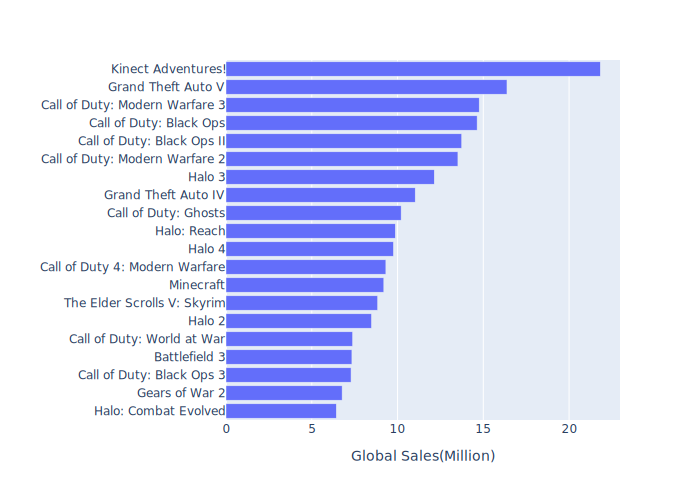

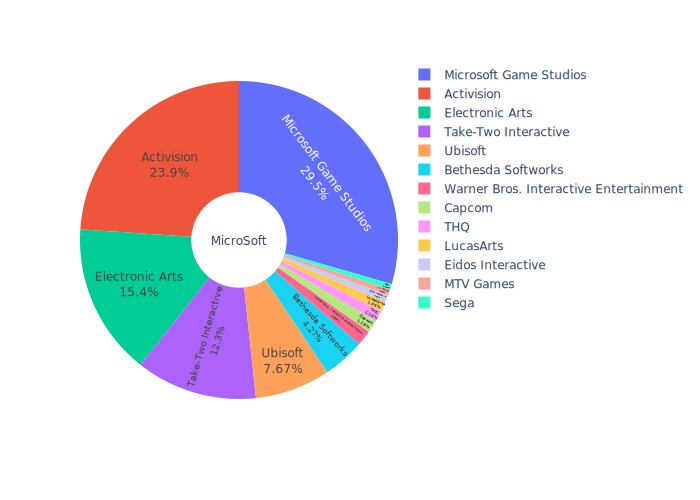

In [119]:
#ms
ms_top20_name = plex.bar(x=top20_ms.Global_Sales,y=top20_ms.Name)
ms_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
ms_top20_name.show()
ms_top100_pub_pie = plex.pie(data_frame=top100_ms,hole=0.3,
                             values='Global_Sales',names='Publisher')
ms_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
ms_top100_pub_pie.update_layout(annotations=[dict(text='MicroSoft',showarrow=False)])
ms_top100_pub_pie.show()

### 2. Hyphothesis Test (multi vs. native)

##### Multi Platform Trend

In [120]:
vgames_sum = vgames.groupby('Platform_Multi',as_index=False)[Sales_list].sum()
display(vgames_sum)
vgames_count = vgames.groupby('Platform_Multi',as_index=False)[Sales_list].count()
display(vgames_count)
vgames_mean = vgames.groupby('Platform_Multi',as_index=False)[Sales_list].mean()
display(vgames_mean)

,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Multi,2410.65,1375.30,303.72,495.03,4584.70
1,Native,1901.17,1020.33,964.06,288.39,4173.95


,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Multi,7651,7651,7651,7651,7651
1,Native,8594,8594,8594,8594,8594


,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Multi,0.315076,0.179754,0.039697,0.064701,0.599229
1,Native,0.221221,0.118726,0.112178,0.033557,0.485682


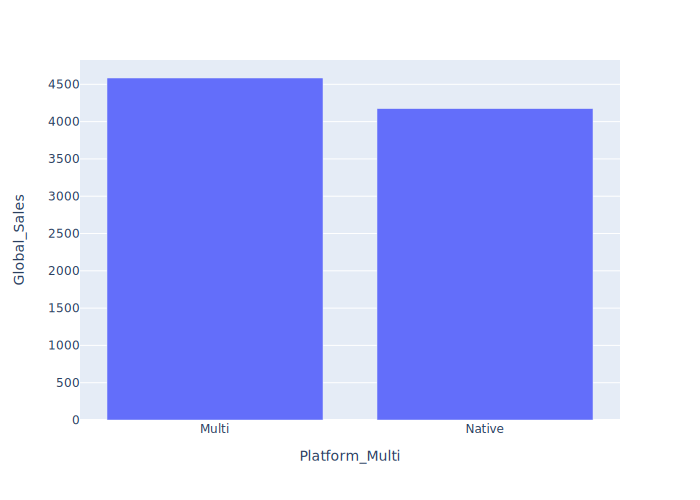

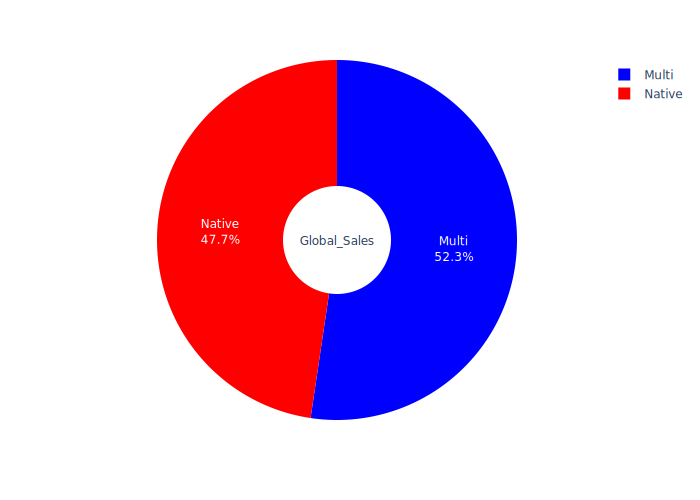

In [121]:
multi_global_sum = plex.bar(data_frame=vgames_sum,x='Platform_Multi',y='Global_Sales')
multi_global_sum.show()
multi_global_sum_pie = plex.pie(data_frame=vgames_sum,hole=0.3,
                             values='Global_Sales',names='Platform_Multi', color='Platform_Multi',
                             color_discrete_map={'Native':'red','Multi':'blue'})
multi_global_sum_pie.update_traces(textposition='inside', textinfo='percent+label')
multi_global_sum_pie.update_layout(annotations=[dict(text='Global_Sales',showarrow=False)])
multi_global_sum_pie.show()

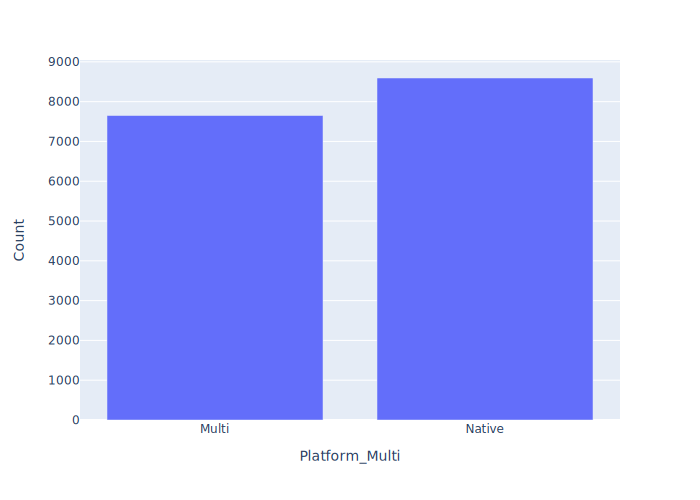

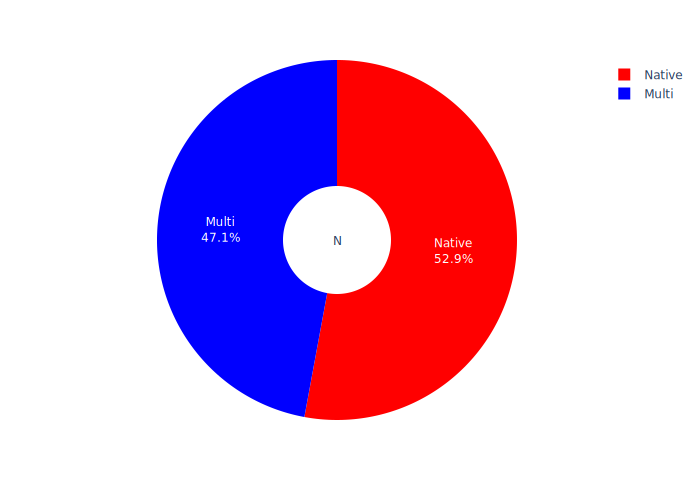

In [122]:
multi_global_n = plex.bar(data_frame=vgames_count,x='Platform_Multi',y='Global_Sales')
multi_global_n.update_layout(yaxis_title=dict(text='Count'))
multi_global_n.show()
multi_global_n_pie = plex.pie(data_frame=vgames_count,hole=0.3,
                             values='Global_Sales',names='Platform_Multi', color='Platform_Multi',
                             color_discrete_map={'Native':'red','Multi':'blue'})
multi_global_n_pie.update_traces(textposition='inside', textinfo='percent+label')
multi_global_n_pie.update_layout(annotations=[dict(text='N',showarrow=False)])
multi_global_n_pie.show()

In [123]:
df_multi_year = vgames.groupby(['Year','Platform_Multi'],as_index=False)[Sales_list].sum()
df_multi_year

,Year,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Multi,8.27,0.52,0.00,0.10,8.89
1,1980,Native,1.86,0.12,0.00,0.01,1.99
2,1981,Multi,5.55,0.33,0.00,0.06,5.94
3,1981,Native,27.85,1.63,0.00,0.26,29.74
4,1982,Multi,11.91,0.73,0.00,0.15,12.79
...,...,...,...,...,...,...,...
72,2016,Multi,18.20,21.44,7.07,6.29,53.00
73,2016,Native,4.46,5.32,6.63,1.46,17.87
74,2017,Multi,0.00,0.00,0.04,0.00,0.04
75,2017,Native,0.00,0.00,0.01,0.00,0.01


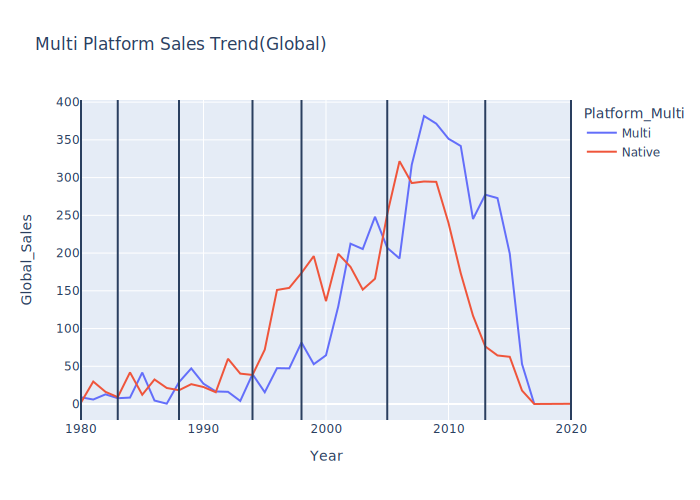

In [124]:
year_multi = plex.line(data_frame=df_multi_year,x='Year',y='Global_Sales',
                       color='Platform_Multi',title='Multi Platform Sales Trend(Global)')
year_multi.add_vline(1980)
year_multi.add_vline(1983)
year_multi.add_vline(1988)
year_multi.add_vline(1994)
year_multi.add_vline(1998)
year_multi.add_vline(2005)
year_multi.add_vline(2013)
year_multi.add_vline(2020)
year_multi.show()

In [125]:
df_multi_gen = vgames.groupby(['Generation','Platform_Multi'],as_index=False)[Sales_list].sum()
df_multi_gen

,Generation,Platform_Multi,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Multi,26.17,1.60,0.00,0.31,28.08
1,2,Native,54.15,3.23,0.00,0.52,57.90
2,3,Multi,55.28,10.35,37.61,1.76,105.00
3,3,Native,70.66,10.85,61.04,3.57,146.12
4,4,Multi,82.93,26.58,44.95,4.37,158.83
5,4,Native,118.00,54.00,159.39,8.47,339.86
6,5,Multi,160.75,76.26,38.63,12.04,287.68
7,5,Native,331.18,186.04,166.28,33.67,717.17
8,6,Multi,665.66,309.28,46.51,144.69,1166.14
9,6,Native,426.18,217.70,165.07,66.44,875.39


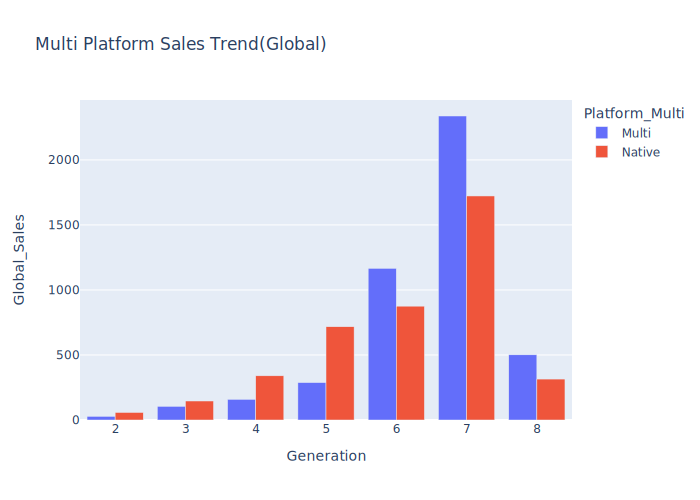

In [126]:
gen_multi = plex.bar(data_frame=df_multi_gen,
                       x='Generation',y='Global_Sales',
                       color='Platform_Multi',title='Multi Platform Sales Trend(Global)',
                       barmode='group')
gen_multi.show()

In [127]:
#multi
df_multi = vgames.groupby(['Name','Platform_Multi','Publisher'],as_index=False)[Sales_list].sum()
df_multi

,Name,Platform_Multi,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,Native,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,Native,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,Native,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),Native,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,Native,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...
11667,thinkSMART FAMILY!,Native,Conspiracy Entertainment,0.03,0.00,0.00,0.00,0.03
11668,thinkSMART: Chess for Kids,Native,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
11669,uDraw Studio,Native,THQ,1.67,0.58,0.00,0.20,2.45
11670,uDraw Studio: Instant Artist,Multi,THQ,0.09,0.10,0.00,0.02,0.21


In [128]:
#매출 높은 게임 분석(멀티플랫폼)
top20_native = df_multi[df_multi.Platform_Multi == 'Native'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top20_multi = df_multi[df_multi.Platform_Multi == 'Multi'].sort_values(by='Global_Sales',ascending=False).head(20).reset_index(drop=True)
top100_native = df_multi[df_multi.Platform_Multi == 'Native'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)
top100_multi = df_multi[df_multi.Platform_Multi == 'Multi'].sort_values(by='Global_Sales',ascending=False).head(100).reset_index(drop=True)

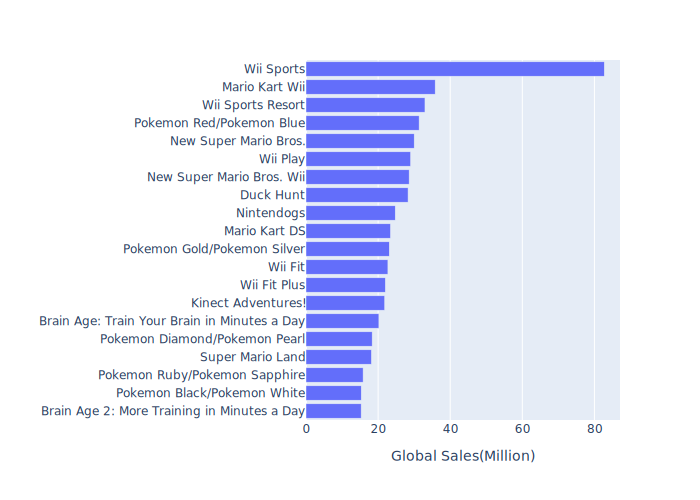

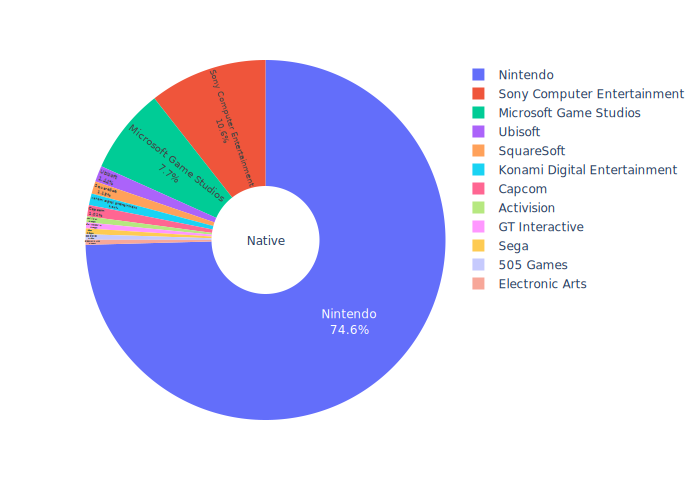

In [129]:
#단일플랫폼
native_top20_name = plex.bar(x=top20_native.Global_Sales,y=top20_native.Name)
native_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
native_top20_name.show()
native_top100_pub_pie = plex.pie(data_frame=top100_native,hole=0.3,
                             values='Global_Sales',names='Publisher')
native_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
native_top100_pub_pie.update_layout(annotations=[dict(text='Native',showarrow=False)])
native_top100_pub_pie.show()

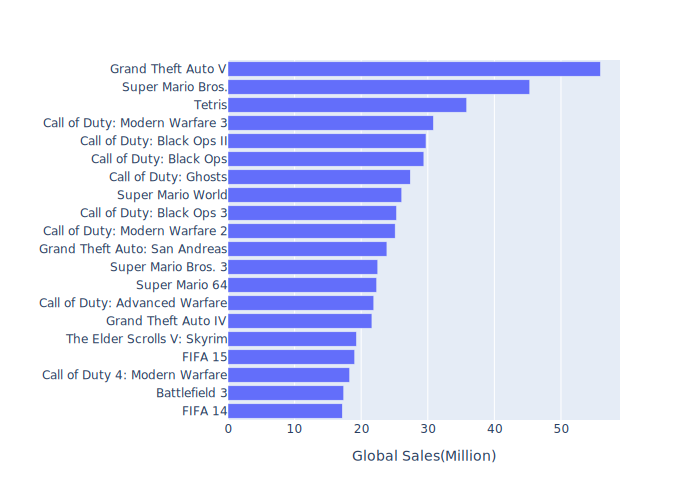

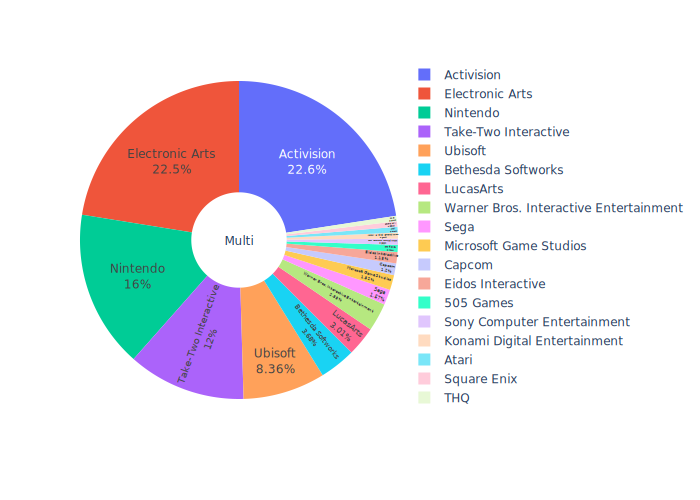

In [130]:
#멀티플랫폼
Multi_top20_name = plex.bar(x=top20_multi.Global_Sales,y=top20_multi.Name)
Multi_top20_name.update_layout(yaxis=dict(autorange='reversed')
                       ,xaxis_title=dict(text='Global Sales(Million)')
                       ,yaxis_title=dict(text=''))
Multi_top20_name.show()
Multi_top100_pub_pie = plex.pie(data_frame=top100_multi,hole=0.3,
                             values='Global_Sales',names='Publisher')
Multi_top100_pub_pie.update_traces(textposition='inside', textinfo='percent+label')
Multi_top100_pub_pie.update_layout(annotations=[dict(text='Multi',showarrow=False)])
Multi_top100_pub_pie.show()

##### T-test(Global)

In [131]:
def mean_conf_inter(data, confidence=0.95):
    data = np.array(data)
    m = np.mean(data)
    n = len(data)
    s = stats.sem(data)
    i = stats.t.ppf((1+confidence)/2,n-1)*s
    return i
vgames_native = vgames.query('Platform_Multi == "Native"')
vgames_multi = vgames.query('Platform_Multi == "Multi"')
error_bar_native = mean_conf_inter(vgames_native.Global_Sales)
error_bar_multi = mean_conf_inter(vgames_multi.Global_Sales)
print(error_bar_native)
print(error_bar_multi)

0.03694679704961938
0.02969598890309412


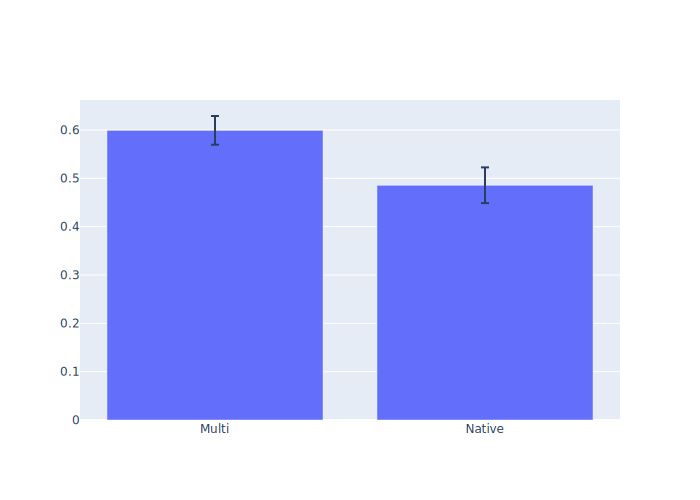

In [132]:
multi_global_mean_error = go.Figure(data=[go.Bar(x=vgames_mean.Platform_Multi,y=vgames_mean.Global_Sales,
                                                 error_y=dict(type='data',array=[error_bar_multi,error_bar_native]))])
multi_global_mean_error.show()

In [133]:
se_native_global = vgames_native.Global_Sales
se_multi_global = vgames_multi.Global_Sales
levene_multi = stats.levene(se_native_global,se_multi_global).pvalue
print('levene 등분산검정 p-value : {:.3f}'.format(levene_multi))
ttest_multi = stats.ttest_ind(se_multi_global,se_native_global,alternative='greater',equal_var=False).pvalue
print('T-test 단측검정 p-value : {:.3f}'.format(ttest_multi))

levene 등분산검정 p-value : 0.006
T-test 단측검정 p-value : 0.000


##### T-test(지역별)

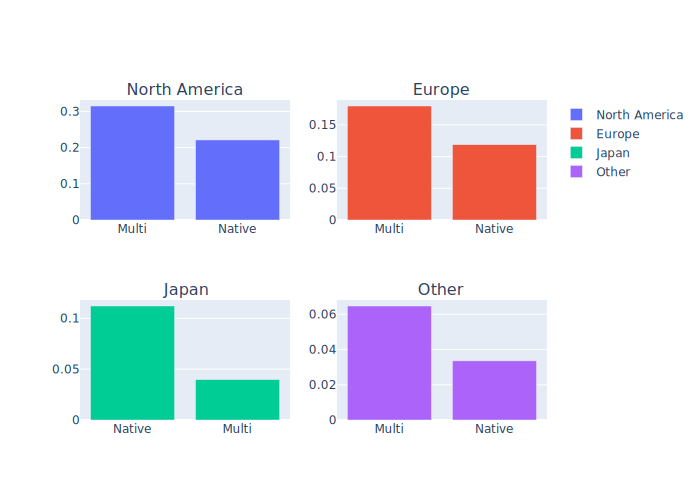

In [134]:
#지역별 barplot
multi_NA = vgames_mean.sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)
multi_EU = vgames_mean.sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)
multi_JP = vgames_mean.sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)
multi_Ot = vgames_mean.sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

region_multi = plsub(rows=2,cols=2,subplot_titles=('North America','Europe','Japan','Other'))
region_multi.add_bar(x= multi_NA.Platform_Multi,y=multi_NA.NA_Sales,name='North America',row=1,col=1)
region_multi.add_bar(x= multi_EU.Platform_Multi,y=multi_EU.EU_Sales,name='Europe',row=1,col=2)
region_multi.add_bar(x= multi_JP.Platform_Multi,y=multi_JP.JP_Sales,name='Japan',row=2,col=1)
region_multi.add_bar(x= multi_Ot.Platform_Multi,y=multi_Ot.Other_Sales,name='Other',row=2,col=2)
region_multi.update_xaxes(tickangle= 0)
region_multi.show()

In [135]:
NA_native_global = vgames_native.NA_Sales
NA_multi_global = vgames_multi.NA_Sales
levene_multi = stats.levene(NA_native_global,NA_multi_global).pvalue
print('NA levene 등분산검정 p-value : {:.3f}'.format(levene_multi))
ttest_multi = stats.ttest_ind(NA_multi_global,NA_native_global,alternative='greater',equal_var=False).pvalue
print('NA T-test 단측검정 p-value : {:.3f}'.format(ttest_multi))

NA levene 등분산검정 p-value : 0.000
NA T-test 단측검정 p-value : 0.000


In [136]:
EU_native_global = vgames_native.EU_Sales
EU_multi_global = vgames_multi.EU_Sales
levene_multi = stats.levene(EU_native_global,EU_multi_global).pvalue
print('EU levene 등분산검정 p-value : {:.3f}'.format(levene_multi))
ttest_multi = stats.ttest_ind(EU_multi_global,EU_native_global,alternative='greater',equal_var=False).pvalue
print('EU T-test 단측검정 p-value : {:.3f}'.format(ttest_multi))

EU levene 등분산검정 p-value : 0.000
EU T-test 단측검정 p-value : 0.000


In [137]:
JP_native_global = vgames_native.JP_Sales
JP_multi_global = vgames_multi.JP_Sales
levene_multi = stats.levene(JP_native_global,JP_multi_global).pvalue
print('JP levene 등분산검정 p-value : {:.3f}'.format(levene_multi))
ttest_multi = stats.ttest_ind(JP_multi_global,JP_native_global,alternative='less',equal_var=False).pvalue
print('JP T-test 단측검정 p-value : {:.3f}'.format(ttest_multi))

JP levene 등분산검정 p-value : 0.000
JP T-test 단측검정 p-value : 0.000


In [138]:
Other_native_global = vgames_native.Other_Sales
Other_multi_global = vgames_multi.Other_Sales
levene_multi = stats.levene(Other_native_global,Other_multi_global).pvalue
print('Other levene 등분산검정 p-value : {:.3f}'.format(levene_multi))
ttest_multi = stats.ttest_ind(Other_multi_global,Other_native_global,alternative='greater',equal_var=False).pvalue
print('Other T-test 단측검정 p-value : {:.3f}'.format(ttest_multi))

Other levene 등분산검정 p-value : 0.000
Other T-test 단측검정 p-value : 0.000


# 💡Part4. Conclusion

### Genre – 어떤 게임의 장르로?

Global - Action, Sports, Shooter 장르가 무난할 것

일본 – RPG 장르도 효과적, Shooter장르는 비효과적

### Platform Type – 어떤 플랫폼 형태로?

거치형 콘솔이 우세했으나, 현재는 전체적으로 매출이 하락세

스마트폰 Mobile Game 시장에 대한 추가적인 조사가 필요함

### Platform Company – 어떤 기업으로? + 멀티플랫폼으로?

비디오 게임 시장에서 아직 닌텐도와 소니의 양강구도가 유지 중임

마이크로소프트가 올해 Activision-Blizzard를 인수 – 지속적인 조사가 필요함

멀티플랫폼으로 개발하는 것이 세계적으로는 더 높은 매출을 기대해 볼 수 있음

일본 시장을 노린다면 단일플랫폼으로 개발하는 것이 더 높은 매출을 기대해 볼 수 있음